In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Complejidad fuerza bruta

## Variando n

In [3]:
FBRFijo = pd.read_csv("dataNueva/FBRFijo.csv")
display(FBRFijo)

,N,FB_usec,FB_msec,R,RES
0,0,0,0,20,0
1,1,0,0,20,1
2,2,0,0,20,2
3,3,0,0,20,2
4,4,0,0,20,3
5,5,0,0,20,3
6,6,1,0,20,3
7,7,3,0,20,3
8,8,6,0,20,3
9,9,12,0,20,3


In [4]:
def exponencial(x, a):
    return a*(2**x)

In [5]:
coefsFB, cov = curve_fit(f=exponencial, xdata=FBRFijo['N'].to_numpy(), ydata=FBRFijo['FB_usec'].to_numpy(), p0=[0], bounds=(-np.inf, np.inf))

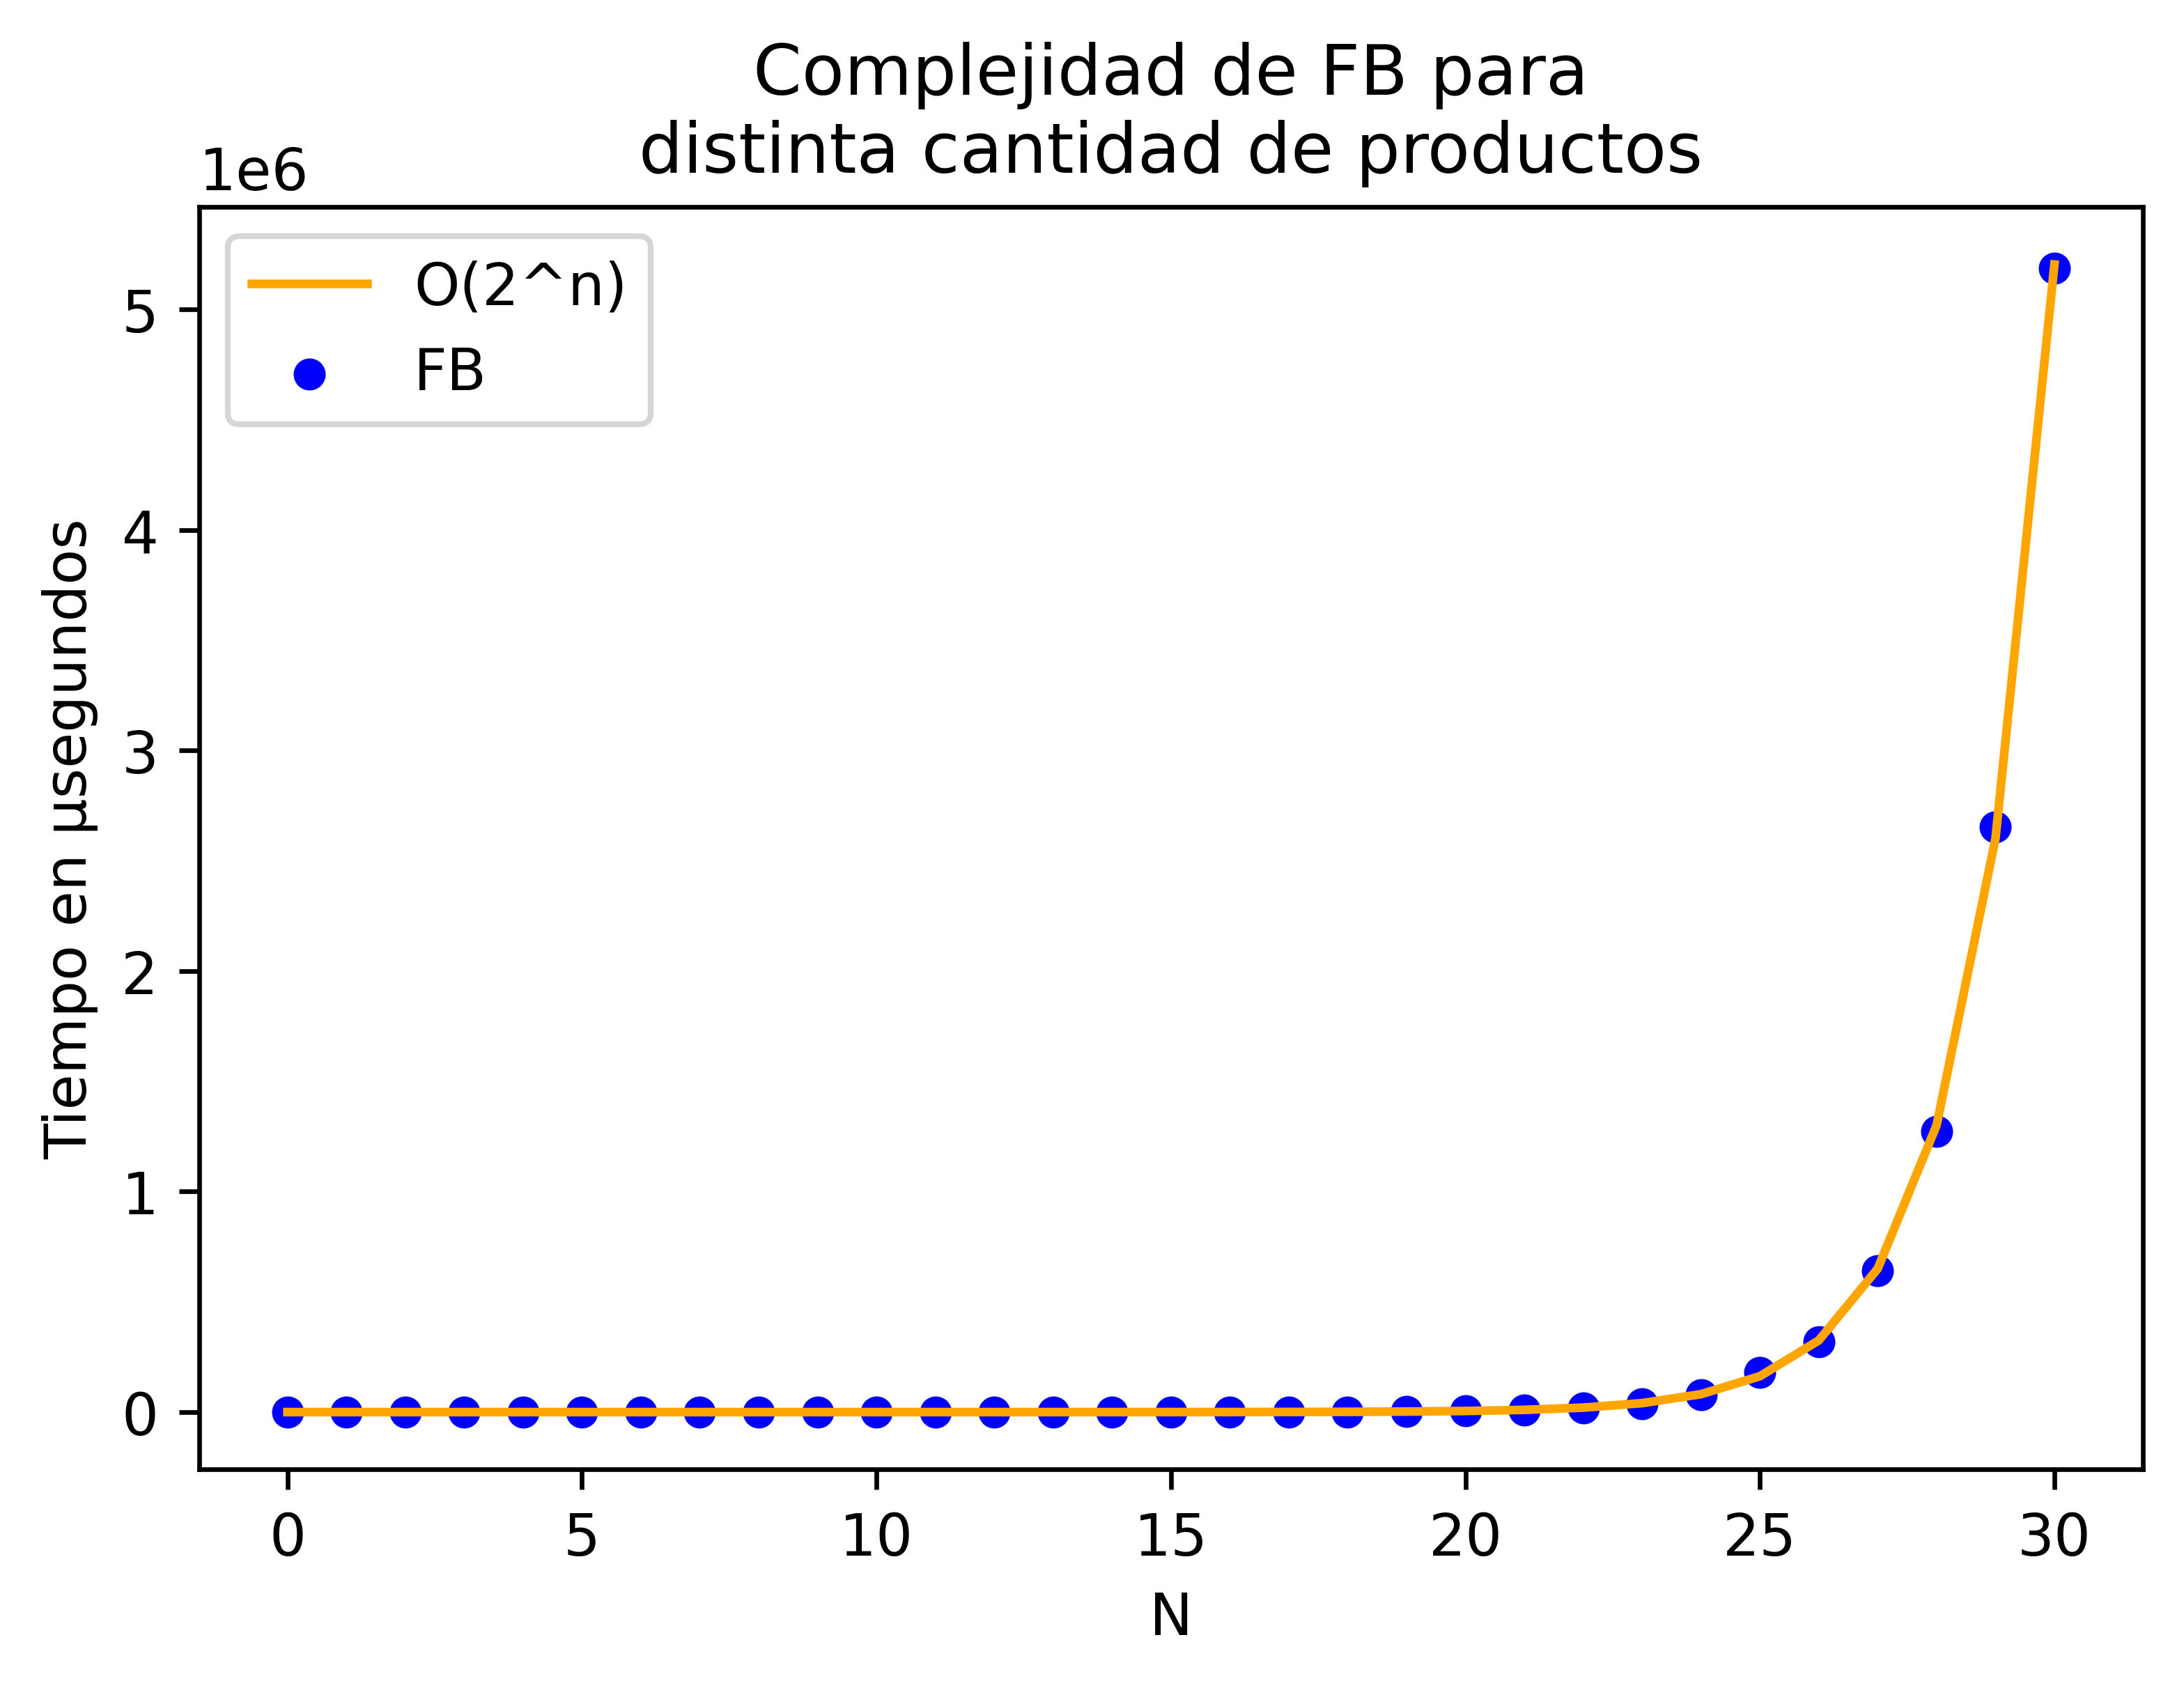

In [6]:
fig, ax = plt.subplots( dpi=600)

x = np.arange(0, 31)



plt.plot(x, exponencial(x,coefsFB[0]), label='O(2^n)', color='orange')
plt.xlabel('N')
plt.ylabel('Tiempo en μsegundos')
plt.title('Complejidad de FB para\ndistinta cantidad de productos')
plt.legend(loc='upper left')

sns.scatterplot(data=FBRFijo, x='N', y='FB_usec', label='FB', color='blue')
# plt.savefig('graficos/curva-FB.png')
plt.show()

In [7]:
FBRFijo['2^n'] = np.array([2**x for x in np.arange(0,31)])

In [14]:
correlacion_pearson(FBRFijo, 'FB_msec', '2^n')

0.99993481511197

In [8]:
def lineal(x, a):
    return x*a

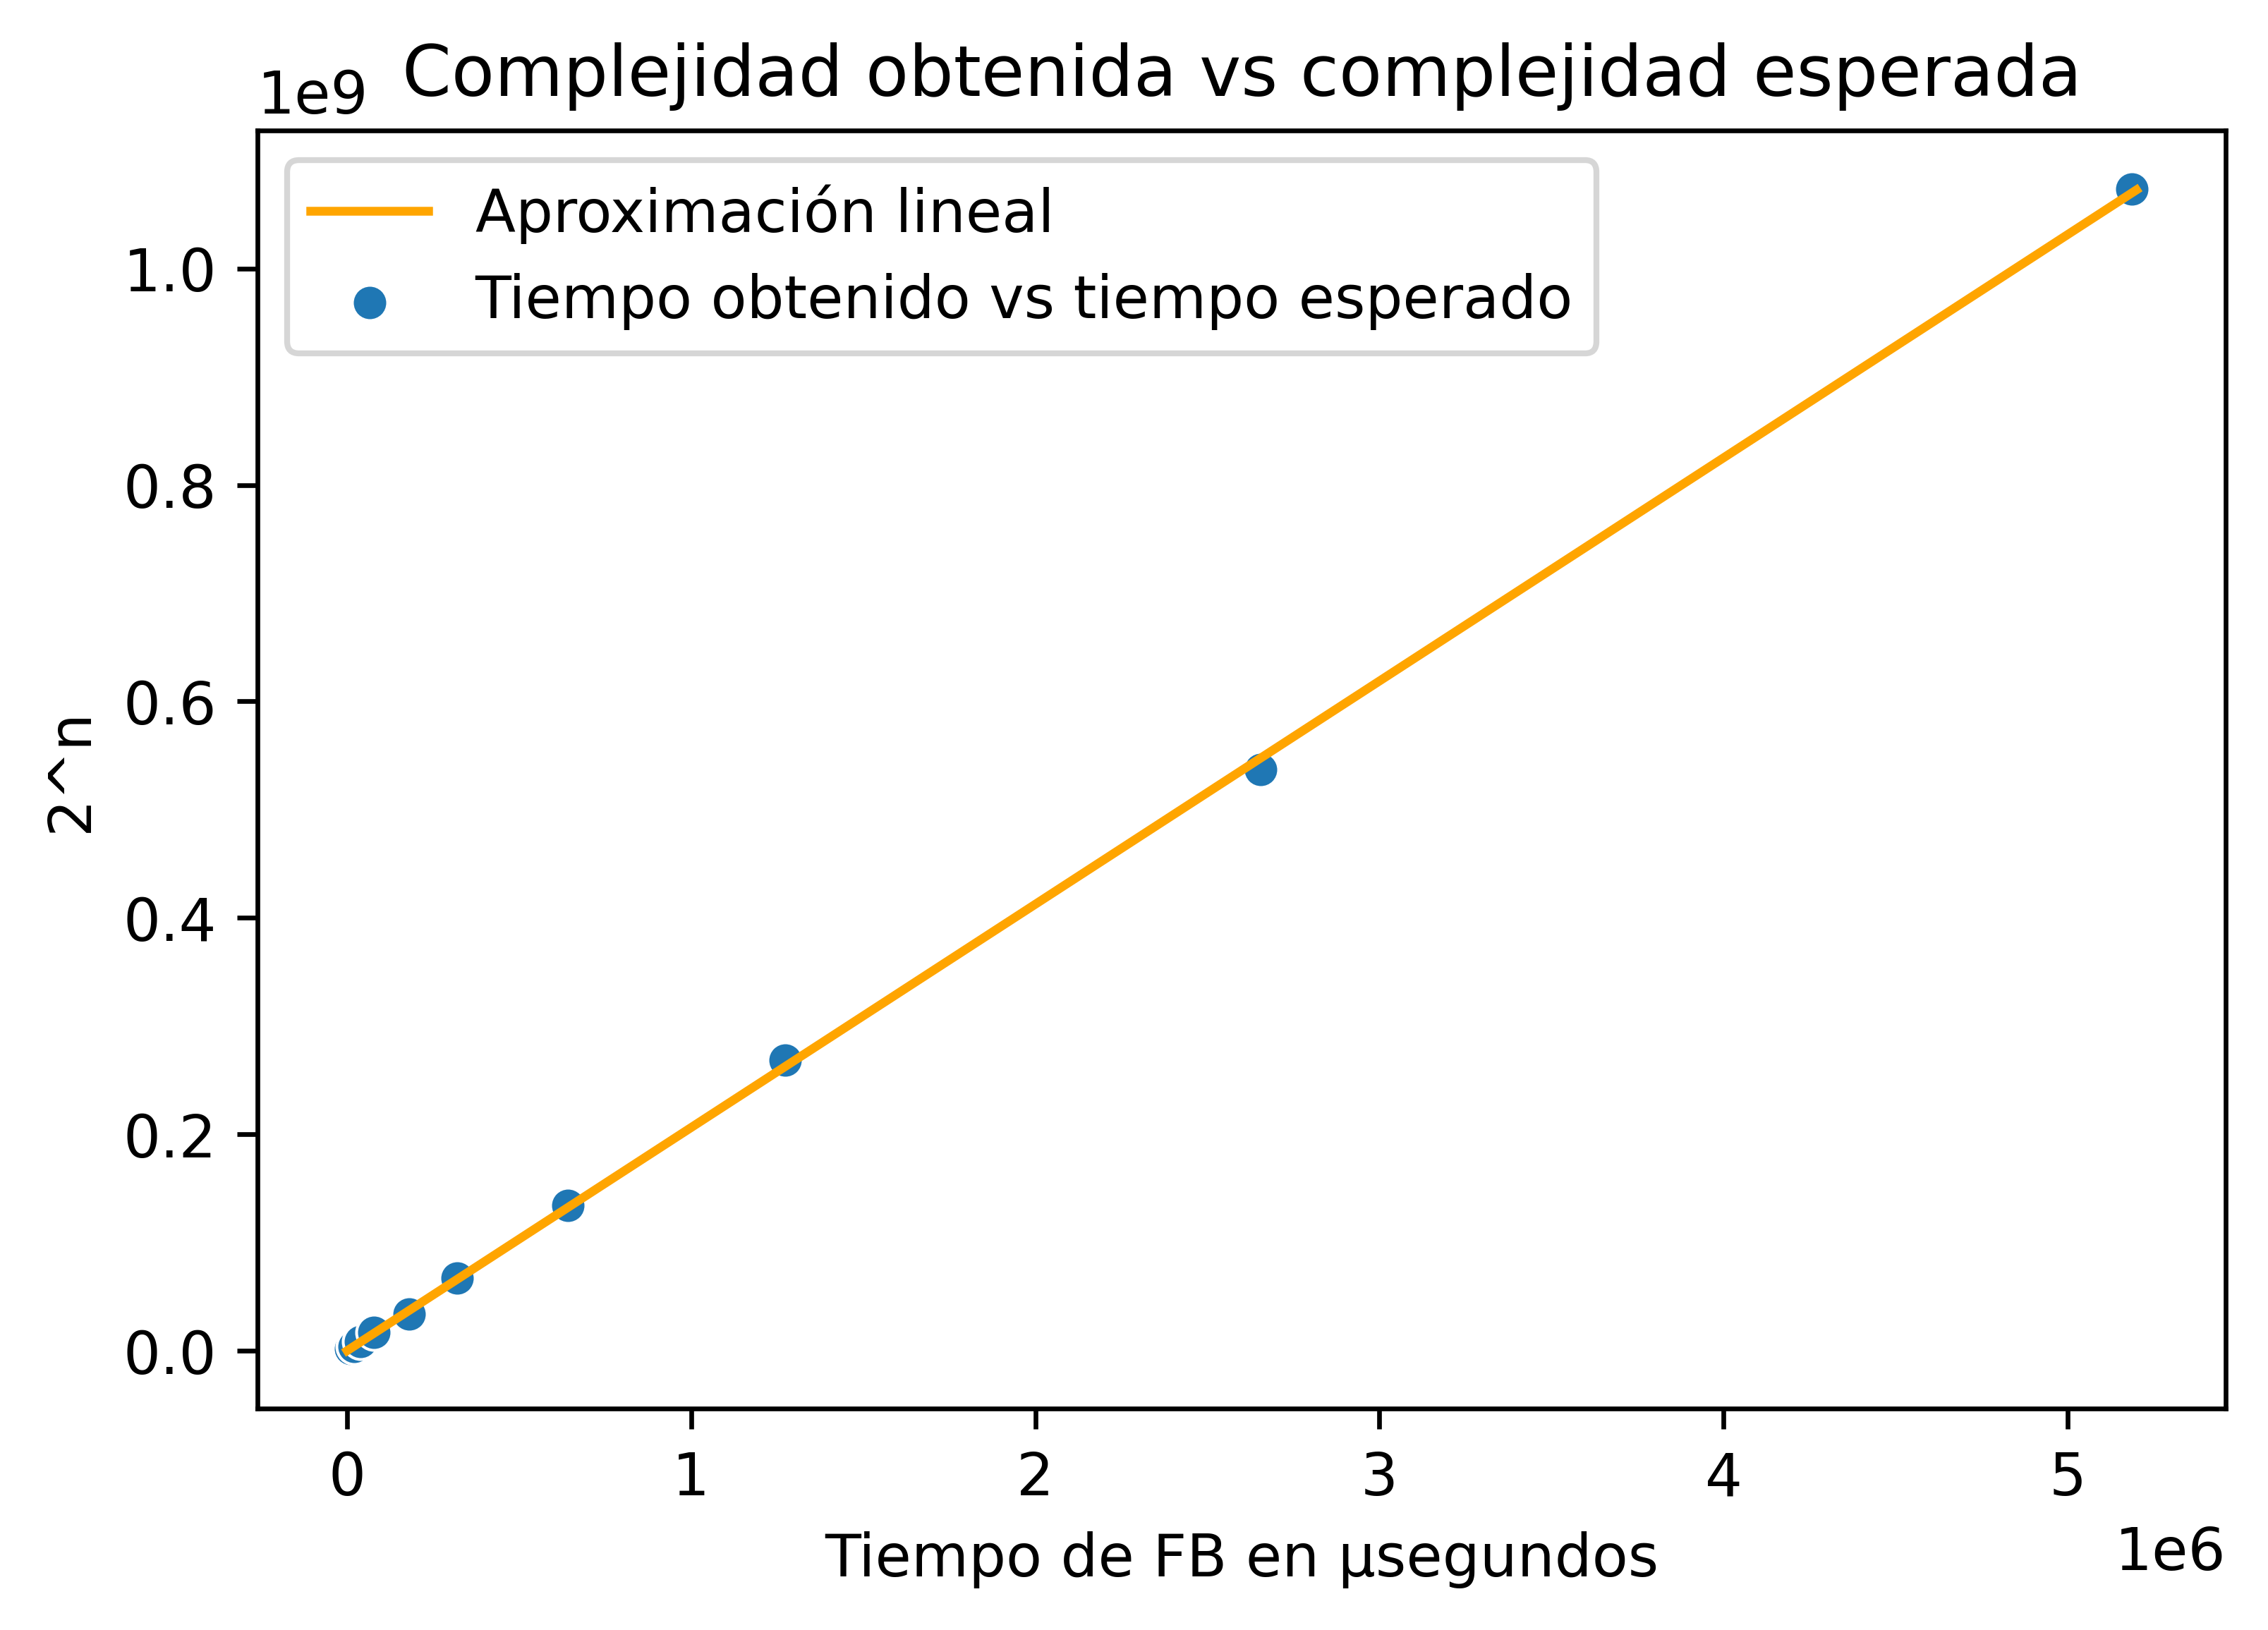

In [10]:
coefsFBLineal, cov = curve_fit(f=lineal, xdata=FBRFijo['FB_usec'].to_numpy(), ydata=FBRFijo['2^n'].to_numpy(), p0=[0], bounds=(-np.inf, np.inf))

fig, ax = plt.subplots(dpi=600)

x = np.array([0, 5200000])


plt.plot(x, lineal(x, coefsFBLineal[0]), color='orange', label='Aproximación lineal')
plt.xlabel('Tiempo de FB en μsegundos')
plt.ylabel('2^n')
plt.title('Complejidad obtenida vs complejidad esperada')
sns.scatterplot(data=FBRFijo, x='FB_usec', y='2^n', label='Tiempo obtenido vs tiempo esperado')
plt.legend(loc='upper left')
# plt.savefig('graficos/obtenida-vs-esperada-FB.png')
plt.show()

# BACKTRACKING AMBAS PODAS

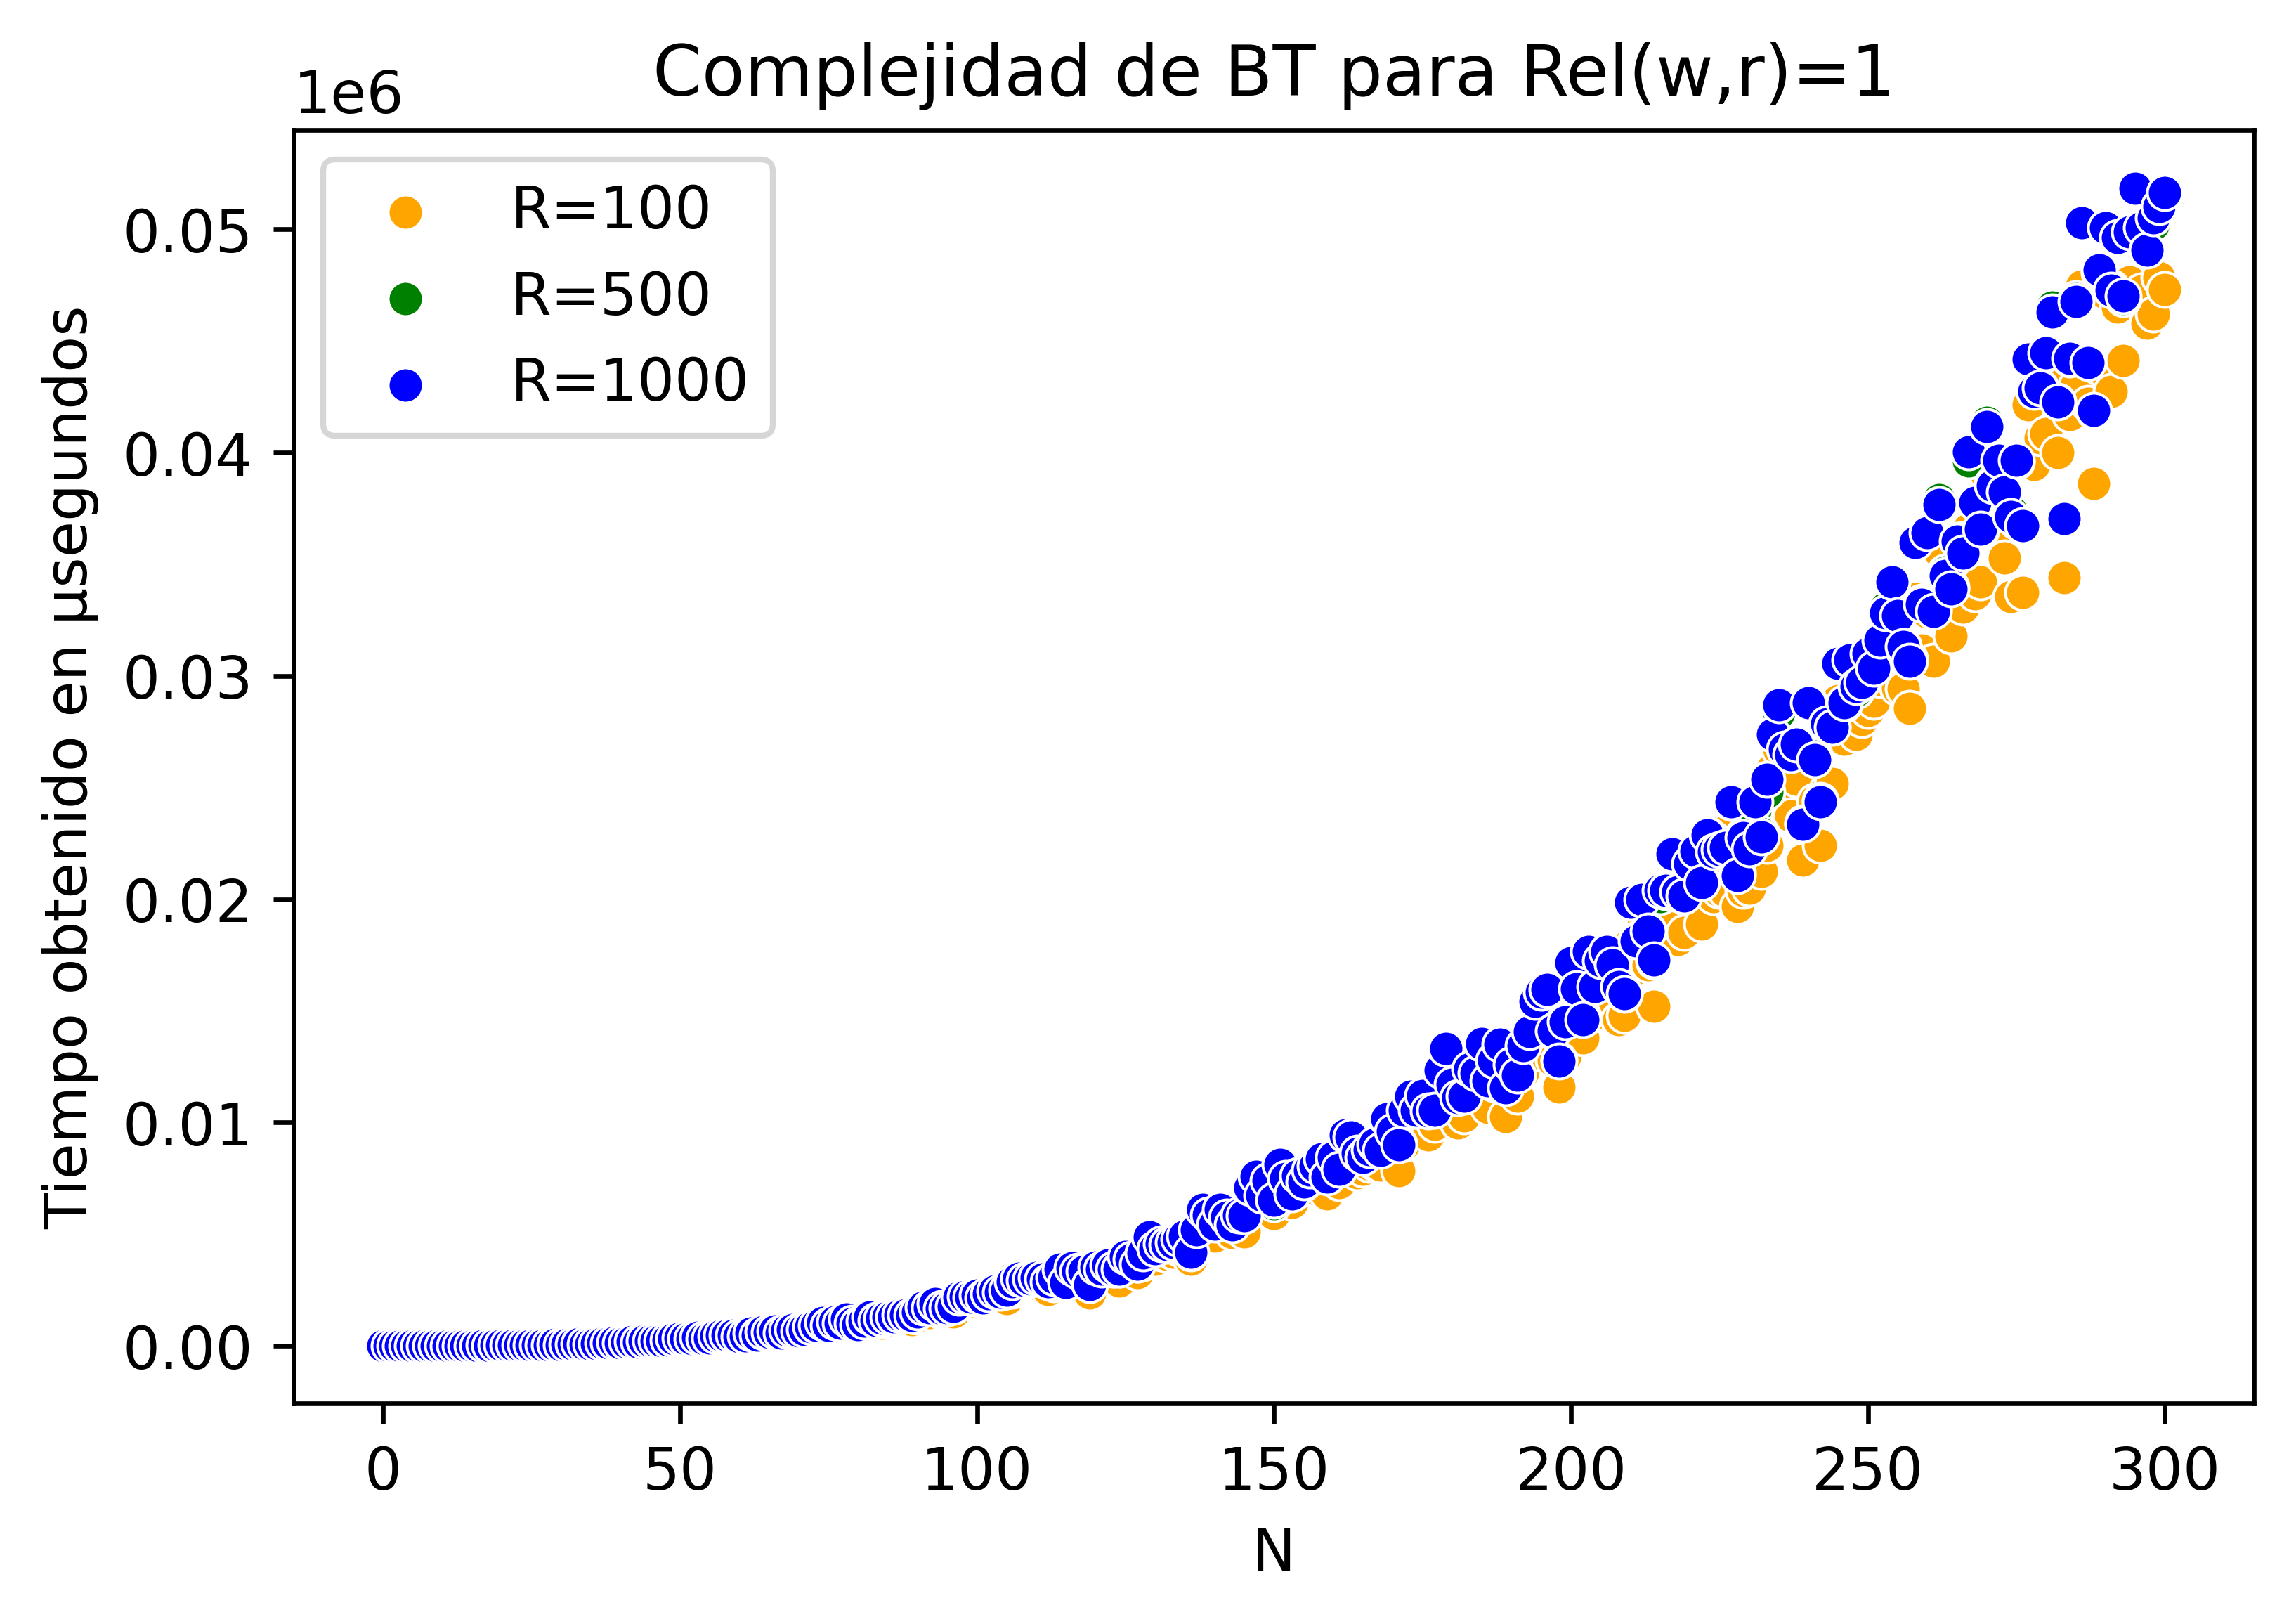

In [11]:
BTEqualRChico = pd.read_csv('data/BTEqualRChico.csv')
BTEqualRMedio = pd.read_csv('data/BTEqualRMedio.csv')
BTEqualRGrande = pd.read_csv('data/BTEqualRGrande.csv')


fig, ax = plt.subplots(dpi=600)
x = np.array([0, 300])
plt.xlabel('N')
plt.ylabel('Tiempo obtenido en μsegundos')
plt.title('Complejidad de BT para Rel(w,r)=1')
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))


sns.scatterplot(data=BTEqualRChico, x='N', y='BTusec', color='orange', label='R=100')
sns.scatterplot(data=BTEqualRMedio, x='N', y='BTusec', color='green', label='R=500')
sns.scatterplot(data=BTEqualRGrande, x='N', y='BTusec', color='blue', label='R=1000')
plt.legend(loc='best')

# plt.savefig('graficos/BTEqual.png')
plt.show()

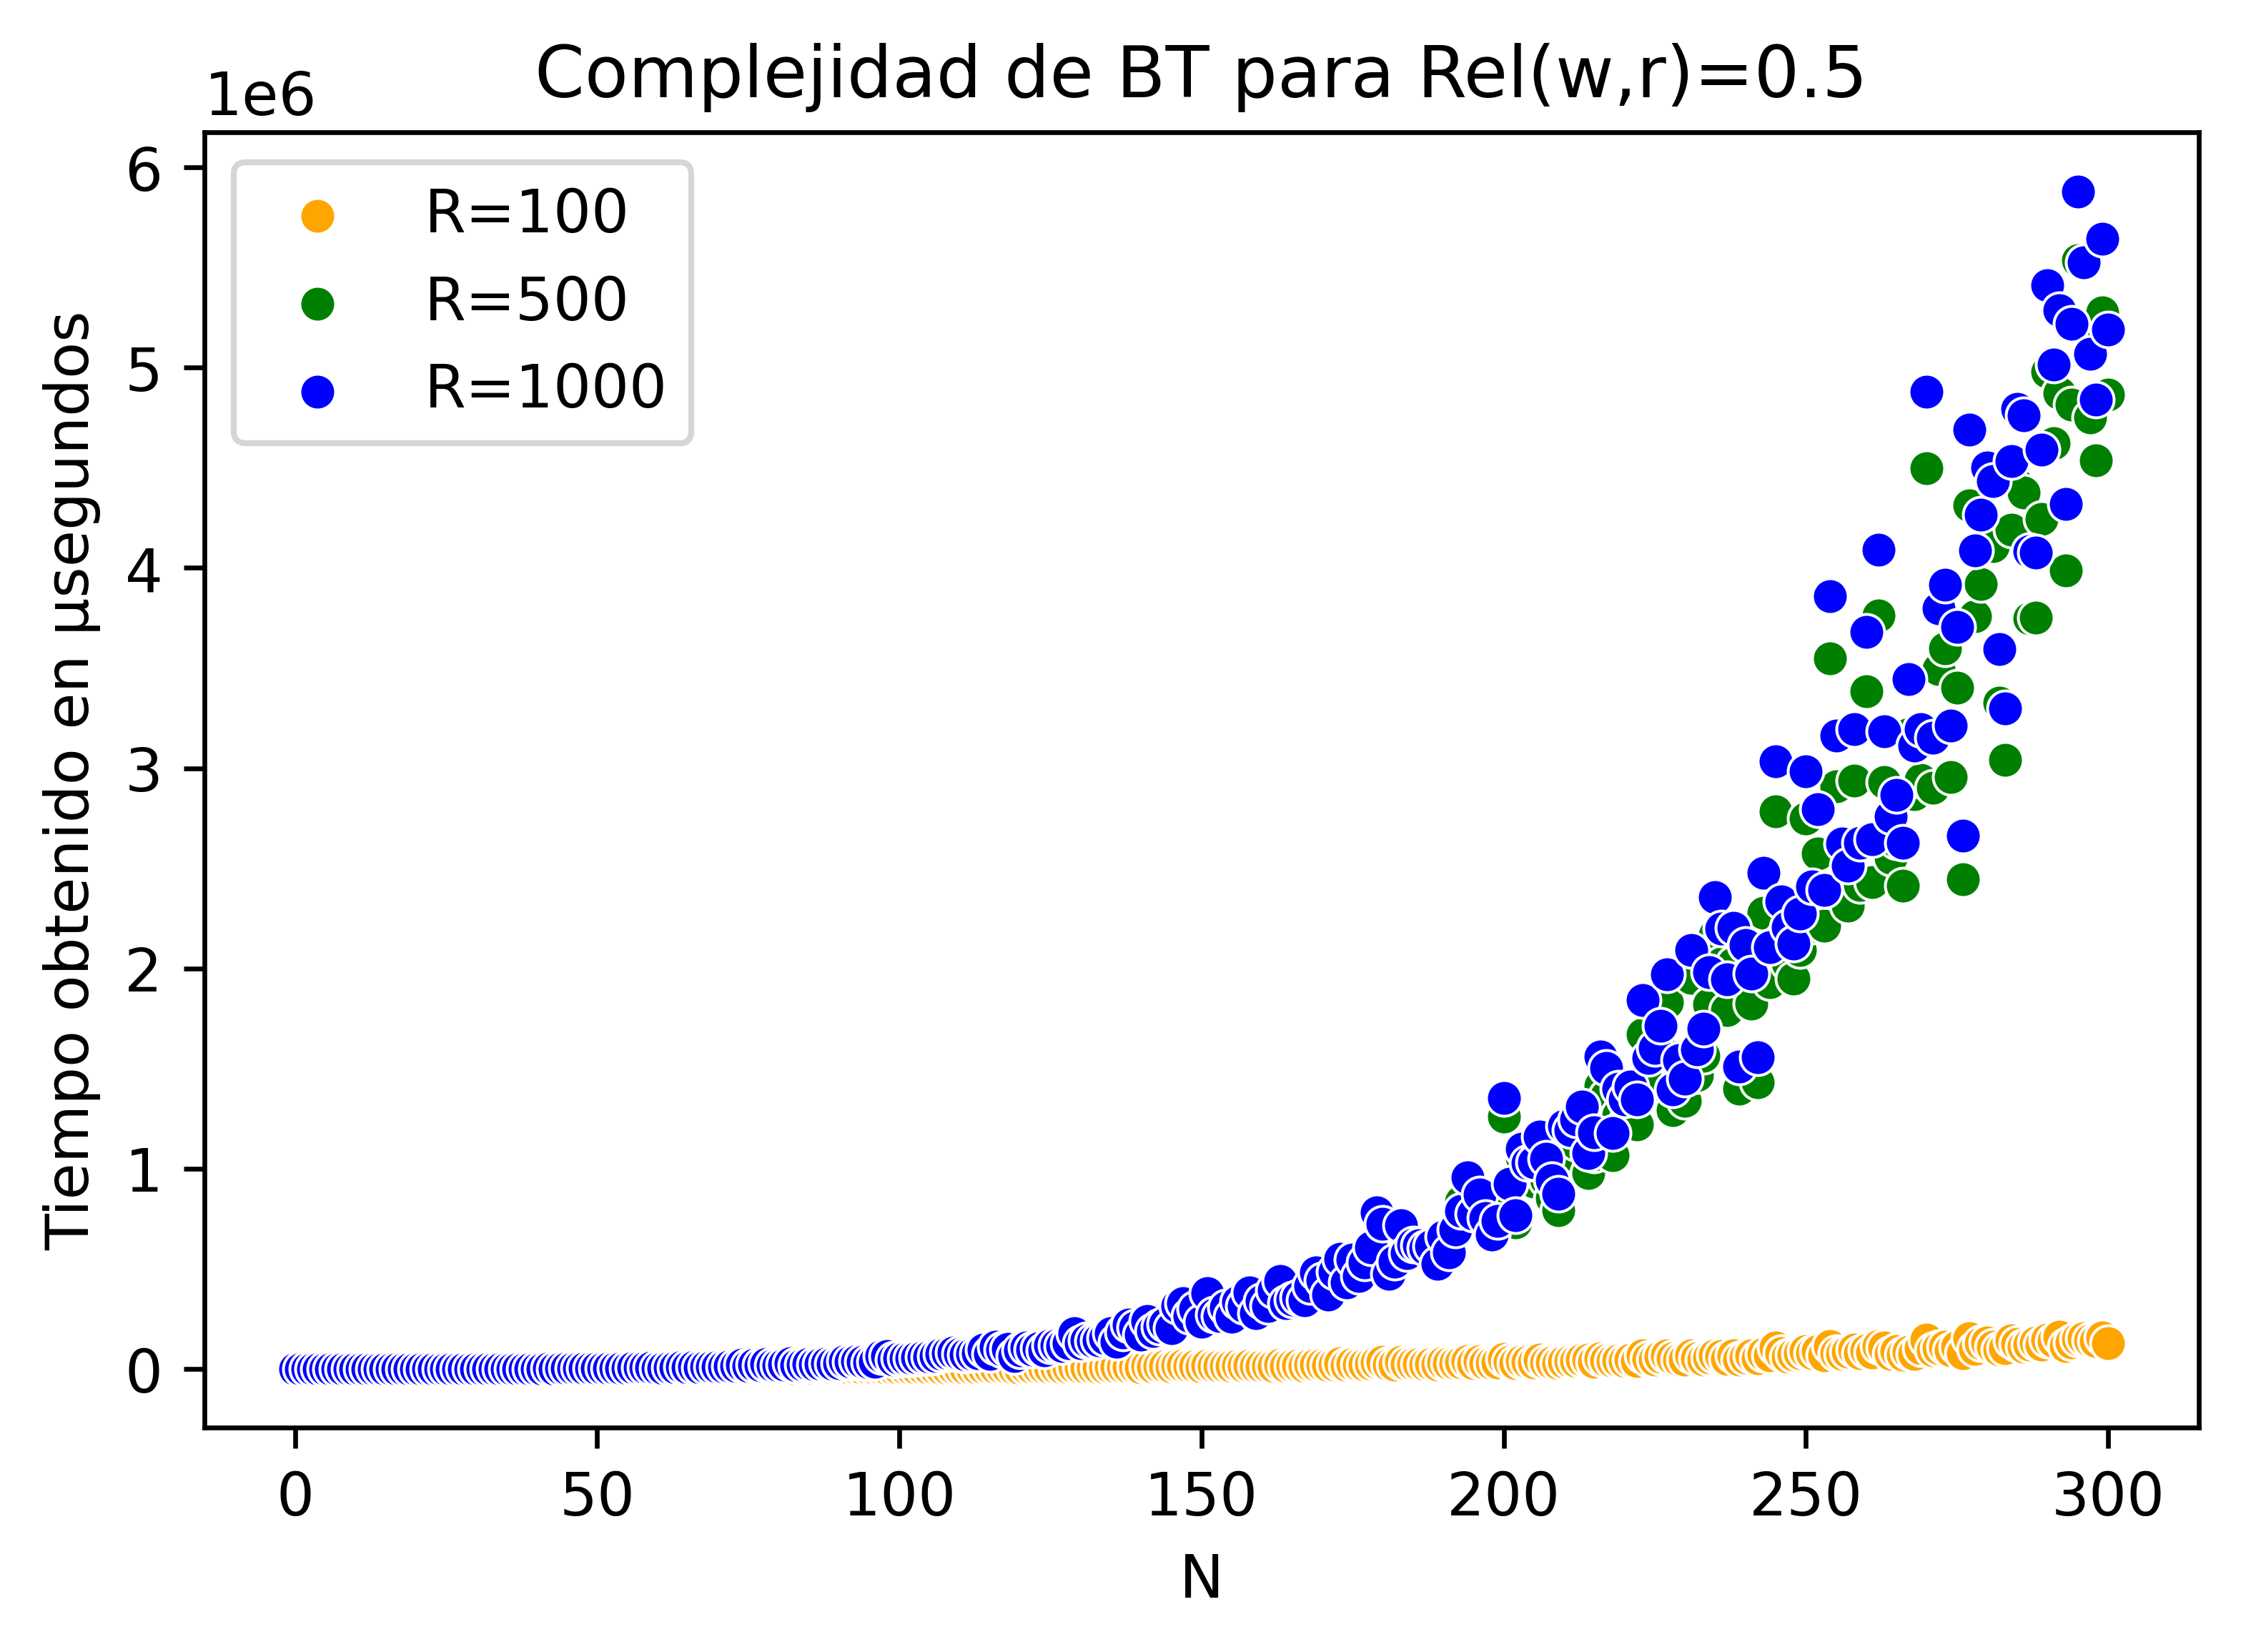

In [12]:
BTRMayorRChico = pd.read_csv('data/BTRMayorRChico.csv')
BTRMayorRMedio = pd.read_csv('data/BTRMayorRMedio.csv')
BTRMayorRGrande = pd.read_csv('data/BTRMayorRGrande.csv')


fig, ax = plt.subplots(dpi=600)
x = np.array([0, 300])
plt.xlabel('N')
plt.ylabel('Tiempo obtenido en μsegundos')
plt.title('Complejidad de BT para Rel(w,r)=0.5')
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))


sns.scatterplot(data=BTRMayorRChico, x='N', y='BTusec', color='orange', label='R=100')
sns.scatterplot(data=BTRMayorRMedio, x='N', y='BTusec', color='green', label='R=500')
sns.scatterplot(data=BTRMayorRGrande, x='N', y='BTusec', color='blue', label='R=1000')
plt.legend(loc='best')

# plt.savefig('graficos/BTRMayor.png')
plt.show()

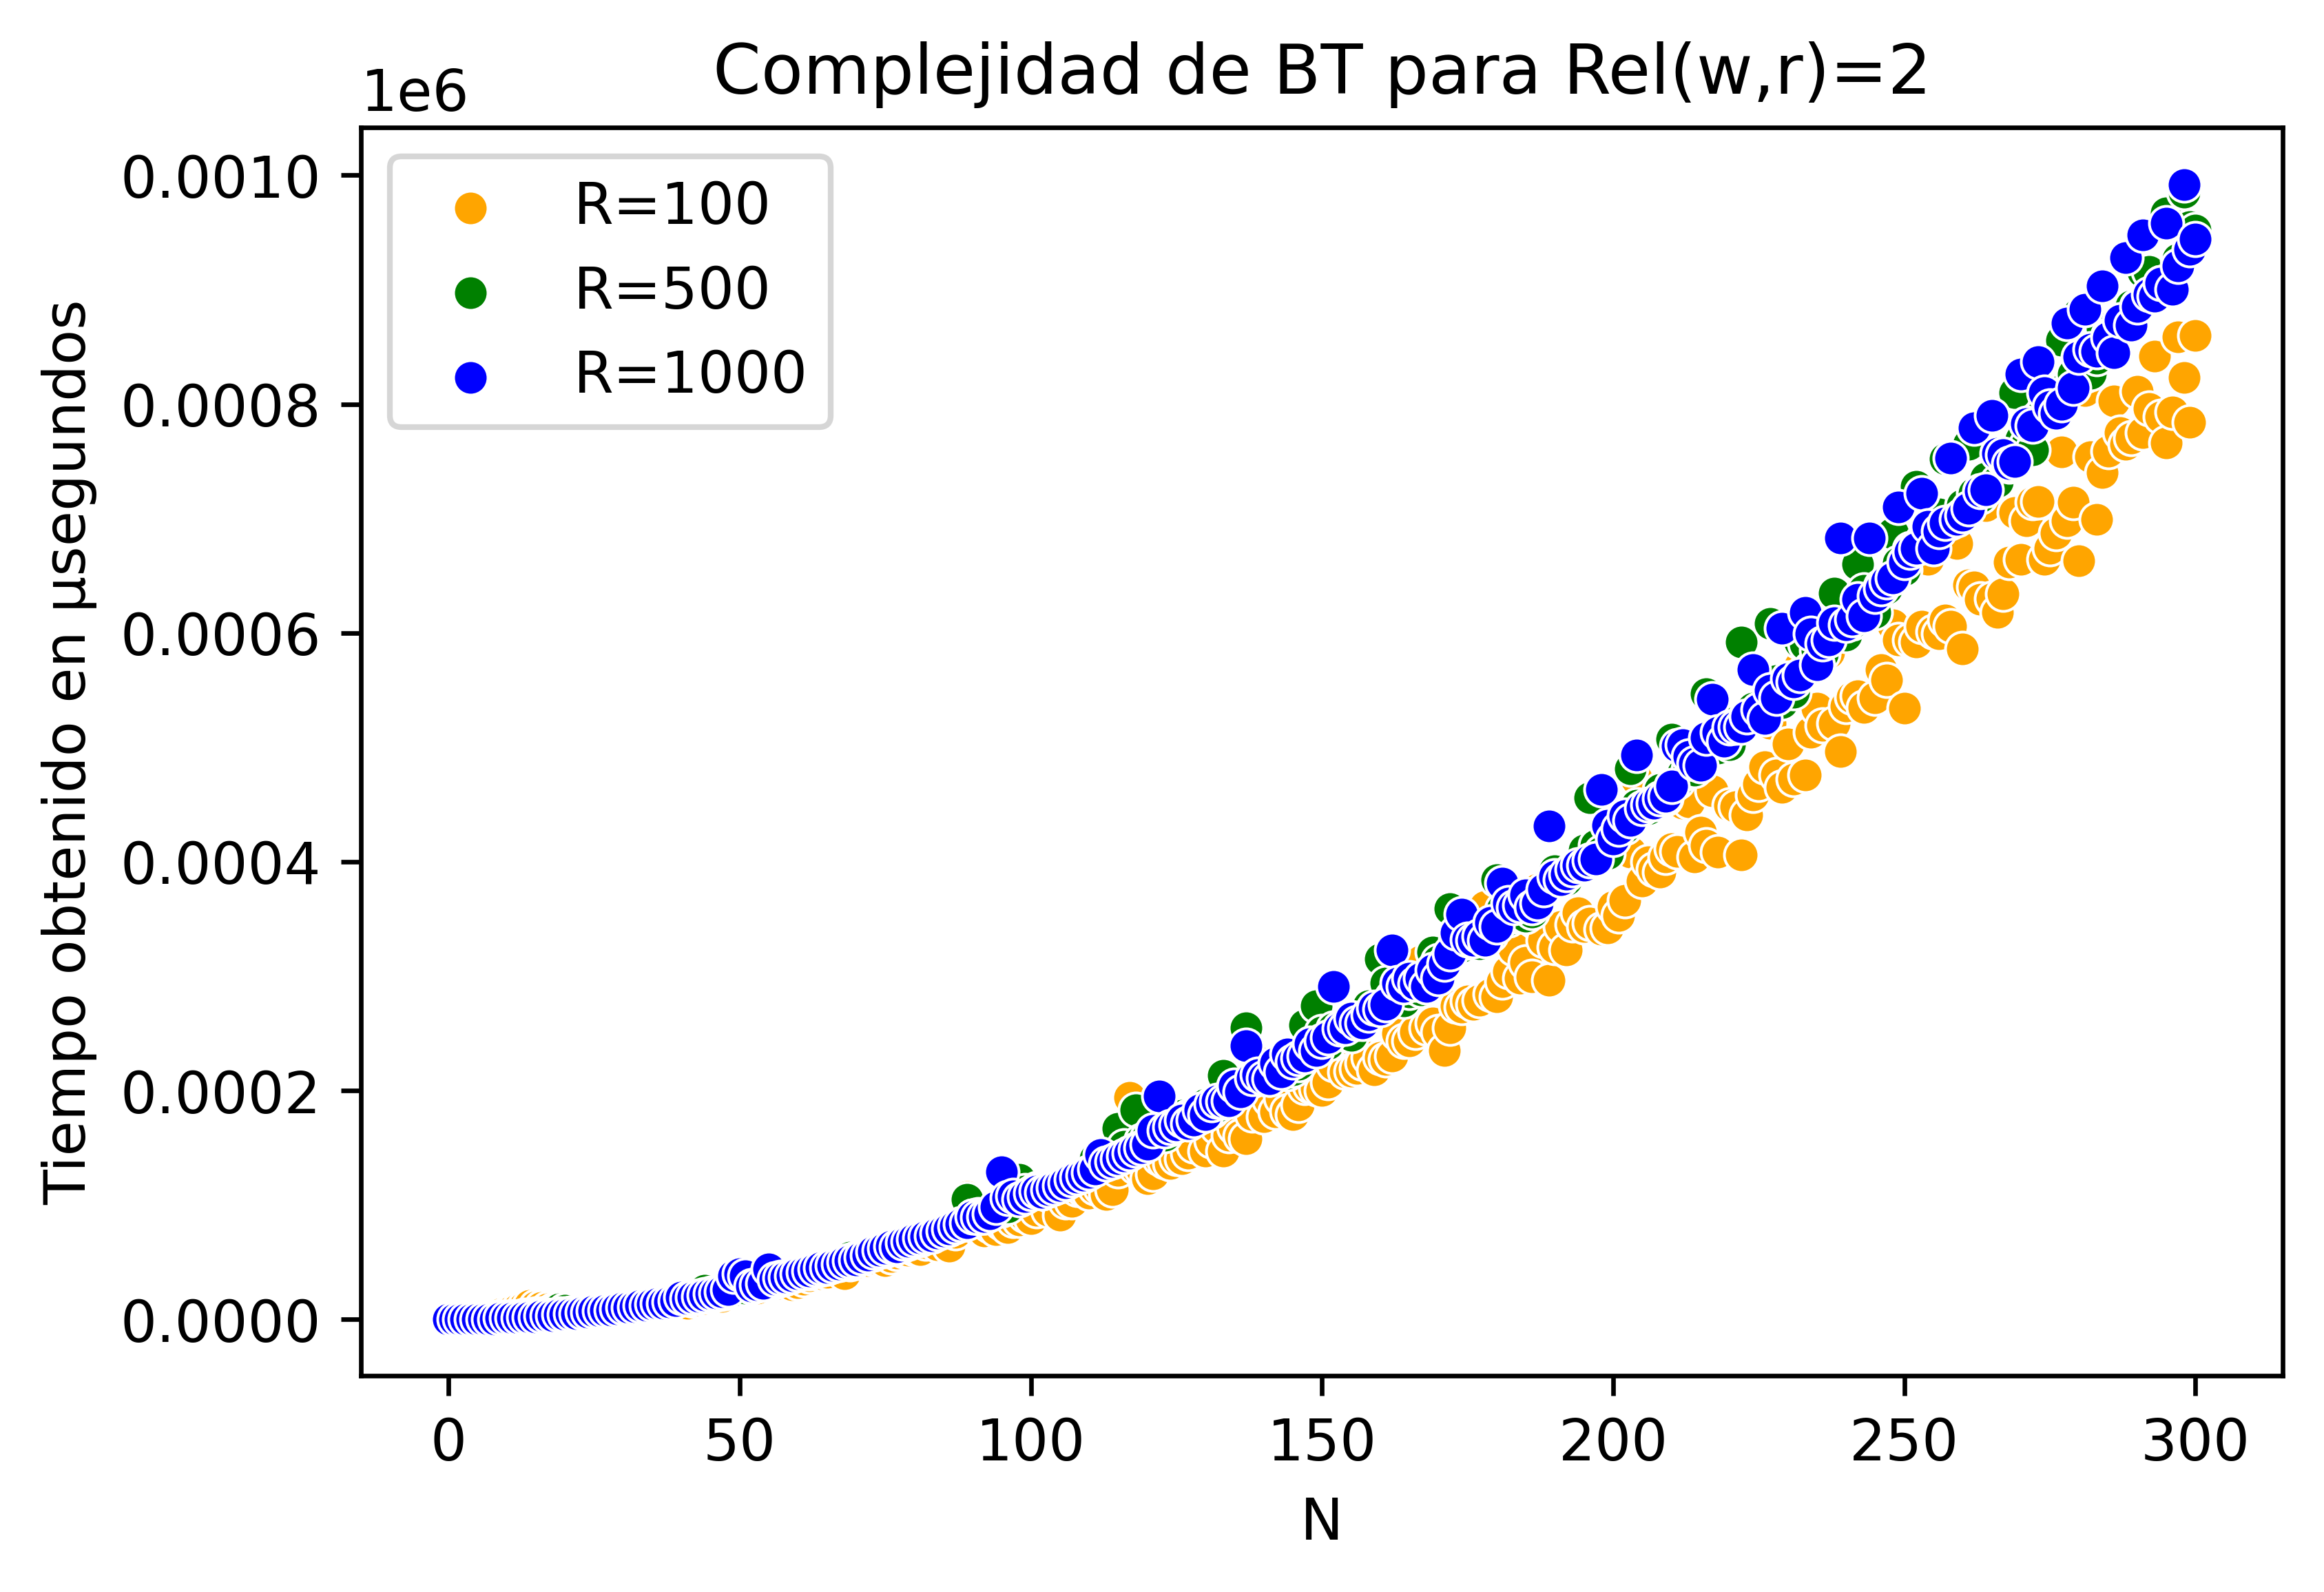

In [13]:
BTRMenorRChico = pd.read_csv('data/BTRMenorRChico.csv')
BTRMenorRMedio = pd.read_csv('data/BTRMenorRMedio.csv')
BTRMenorRGrande = pd.read_csv('data/BTRMenorRGrande.csv')


fig, ax = plt.subplots(dpi=600)
x = np.array([0, 300])
plt.xlabel('N')
plt.ylabel('Tiempo obtenido en μsegundos')
plt.title('Complejidad de BT para Rel(w,r)=2')
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))

sns.scatterplot(data=BTRMenorRChico, x='N', y='BTusec', color='orange', label='R=100')
sns.scatterplot(data=BTRMenorRMedio, x='N', y='BTusec', color='green', label='R=500')
sns.scatterplot(data=BTRMenorRGrande, x='N', y='BTusec', color='blue', label='R=1000')
plt.legend(loc='best')

# plt.savefig('graficos/BTRMenor.png')
plt.show()

## BT ANALISIS PODAS

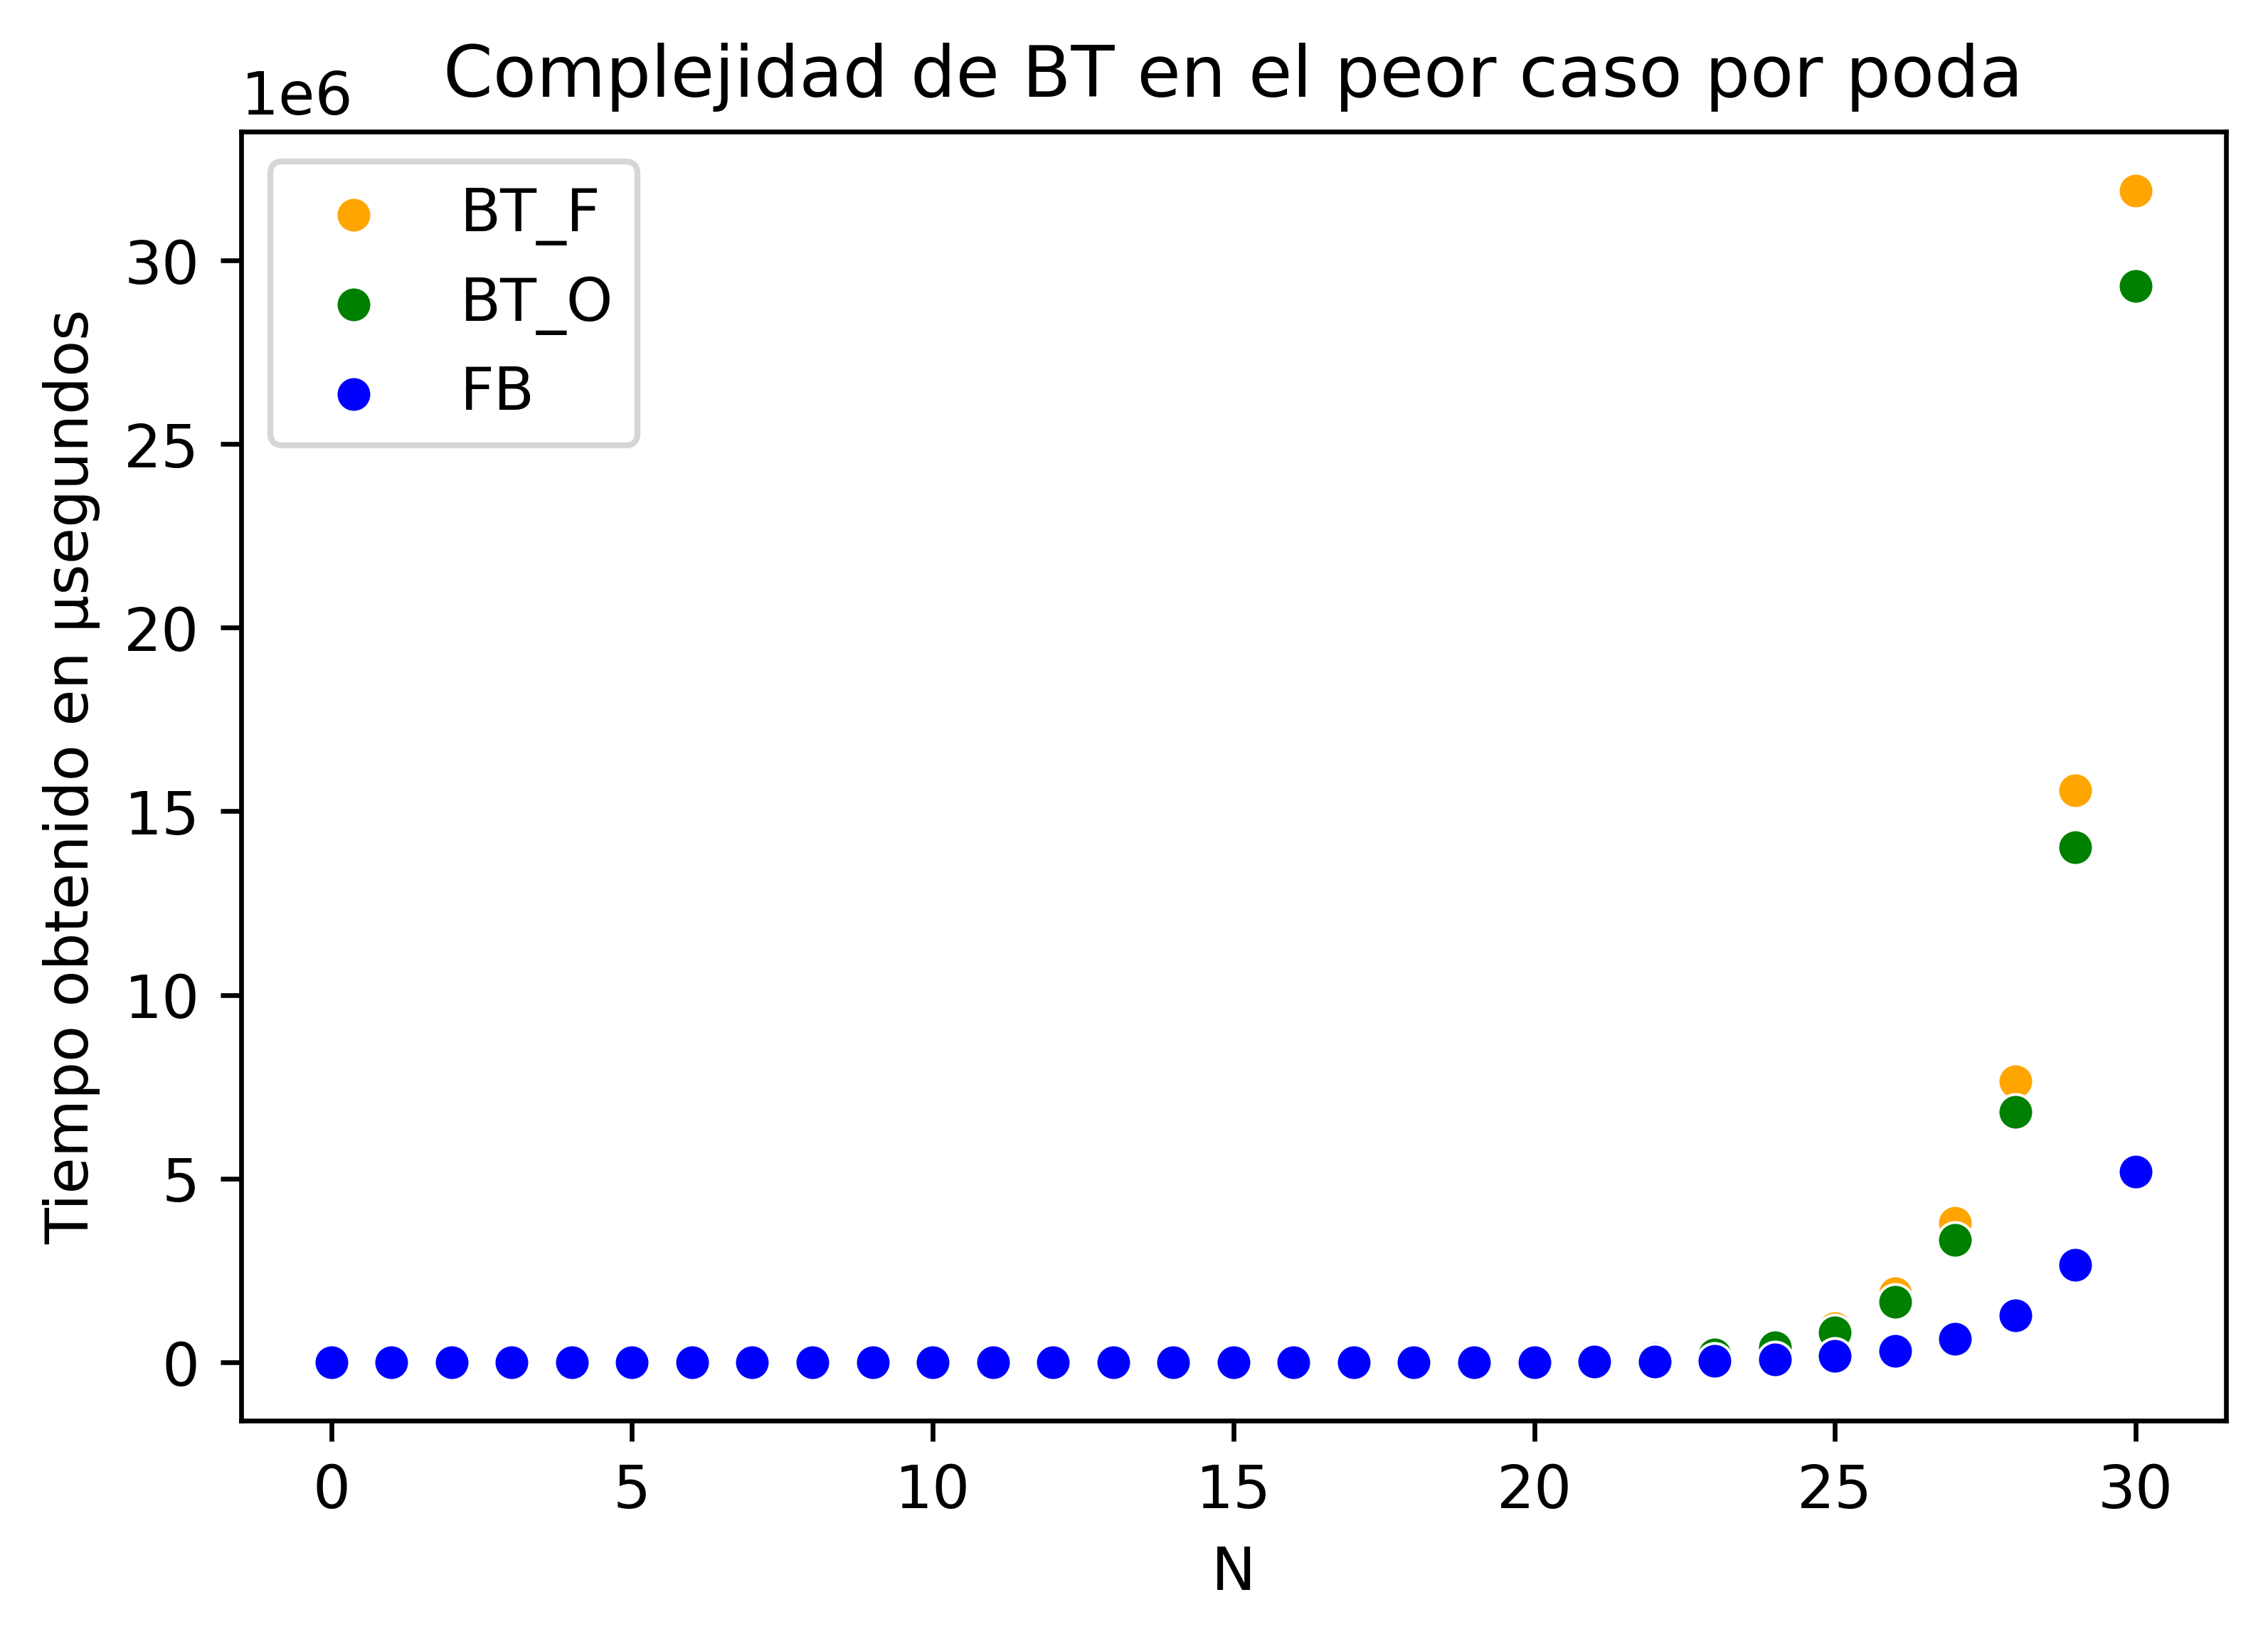

In [14]:
BTFactWorst = pd.read_csv('data/BTFactWorst.csv')
BTOptWorst = pd.read_csv('data/BTOptWorst.csv')



fig, ax = plt.subplots(dpi=600)
plt.xlabel('N')
plt.ylabel('Tiempo obtenido en μsegundos')
plt.title('Complejidad de BT en el peor caso por poda')
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))

sns.scatterplot(data=BTFactWorst, x='N', y='BTusec', label='BT_F', color='orange')
sns.scatterplot(data=BTOptWorst, x='N', y='BTusec', label='BT_O', color='green')
sns.scatterplot(data=FBRFijo, x='N', y='FB_usec', label='FB', color='blue')
plt.legend(loc='best')

# plt.savefig('graficos/BTWorstCase.png')
plt.show()

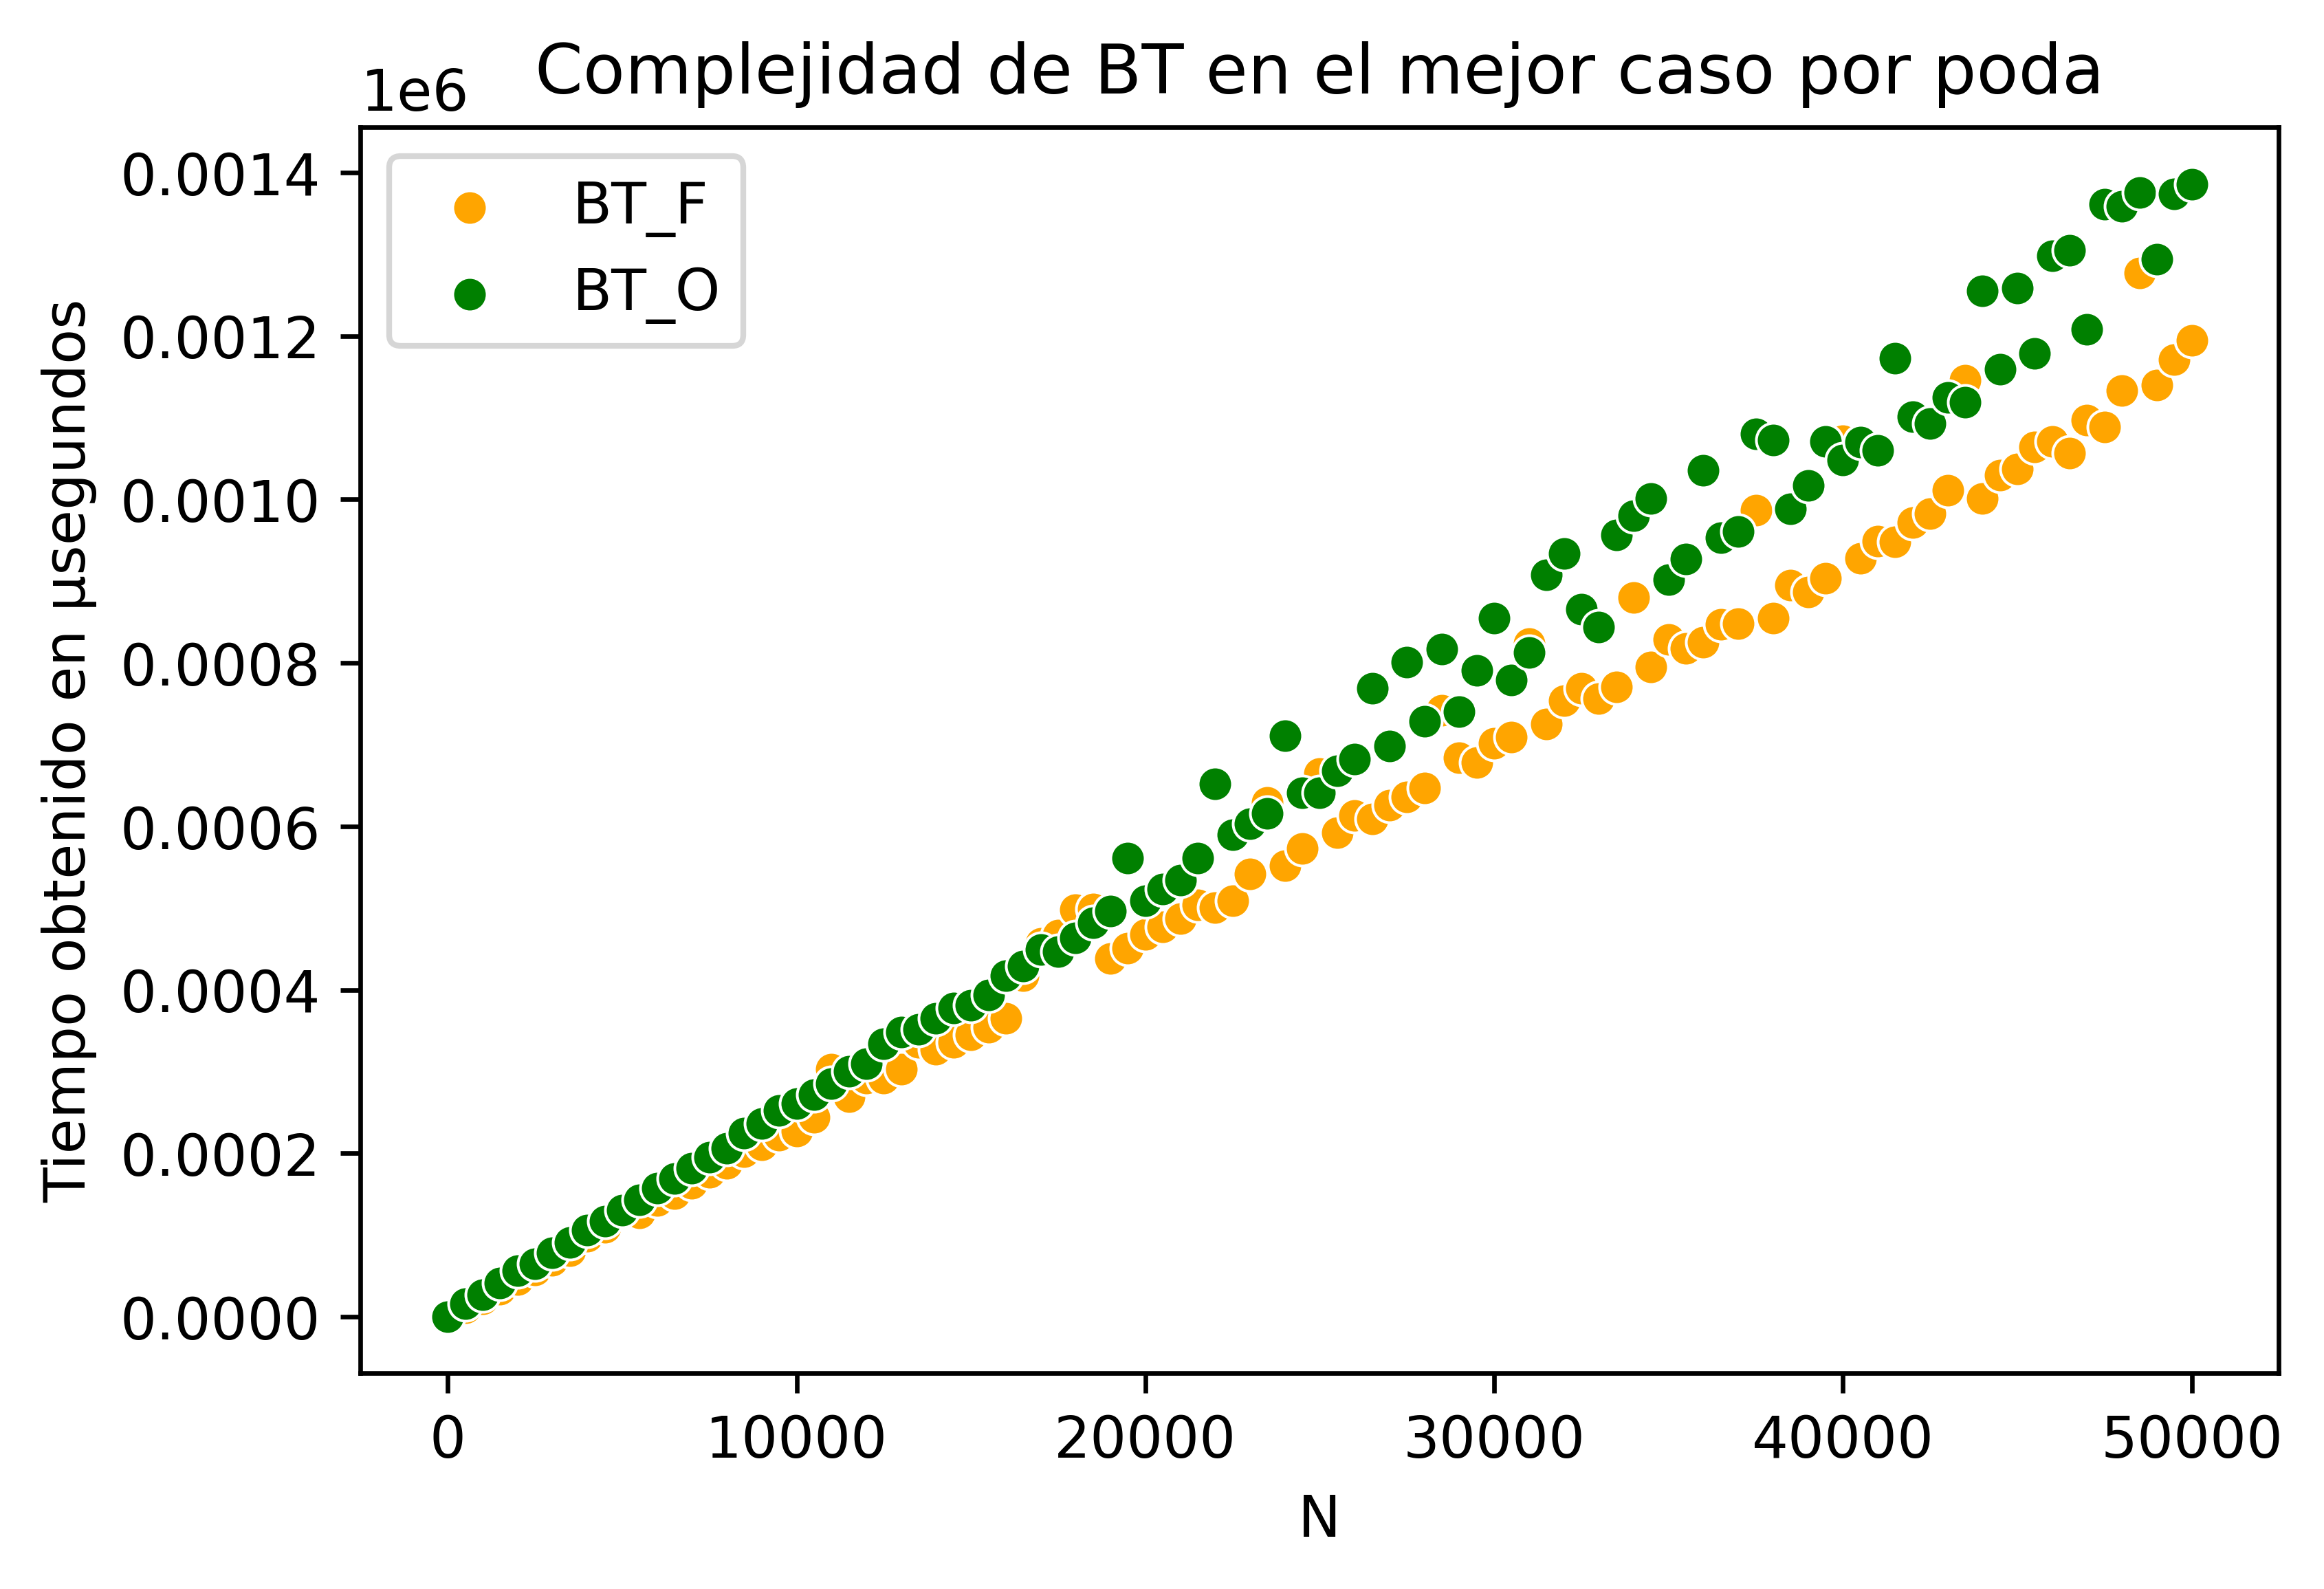

In [15]:
BTFactBest = pd.read_csv('data/BTFactBest.csv')
BTOptBest = pd.read_csv('data/BTOptBest.csv')



fig, ax = plt.subplots(dpi=600)
x = np.array([0, 300])
plt.xlabel('N')
plt.ylabel('Tiempo obtenido en μsegundos')
plt.title('Complejidad de BT en el mejor caso por poda')
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))

sns.scatterplot(data=BTFactBest.iloc[::500, :], x='N', y='BTusec', label='BT_F', color='orange')
sns.scatterplot(data=BTOptBest.iloc[::500, :], x='N', y='BTusec', label='BT_O', color='green')

plt.legend(loc='best')

# plt.savefig('graficos/BTBestCase.png')
plt.show()

# Complejidad de PD

## PD R fijo

In [16]:
PDRFijo = pd.read_csv("data/PDRFijo.csv")
display(PDRFijo)


,DP_usec,DP_msec,N,R,RES
0,154,0,1,1000,0
1,34,0,2,1000,0
2,31,0,3,1000,0
3,34,0,4,1000,0
4,35,0,5,1000,0
...,...,...,...,...,...
9995,14518,14,9996,1000,0
9996,14460,14,9997,1000,0
9997,14456,14,9998,1000,0
9998,14507,14,9999,1000,0


In [18]:
coefsPDRFijo, cov = curve_fit(f=lineal, xdata=PDRFijo['N'].to_numpy(), ydata=PDRFijo['DP_usec'].to_numpy(), p0=[0], bounds=(-np.inf, np.inf))

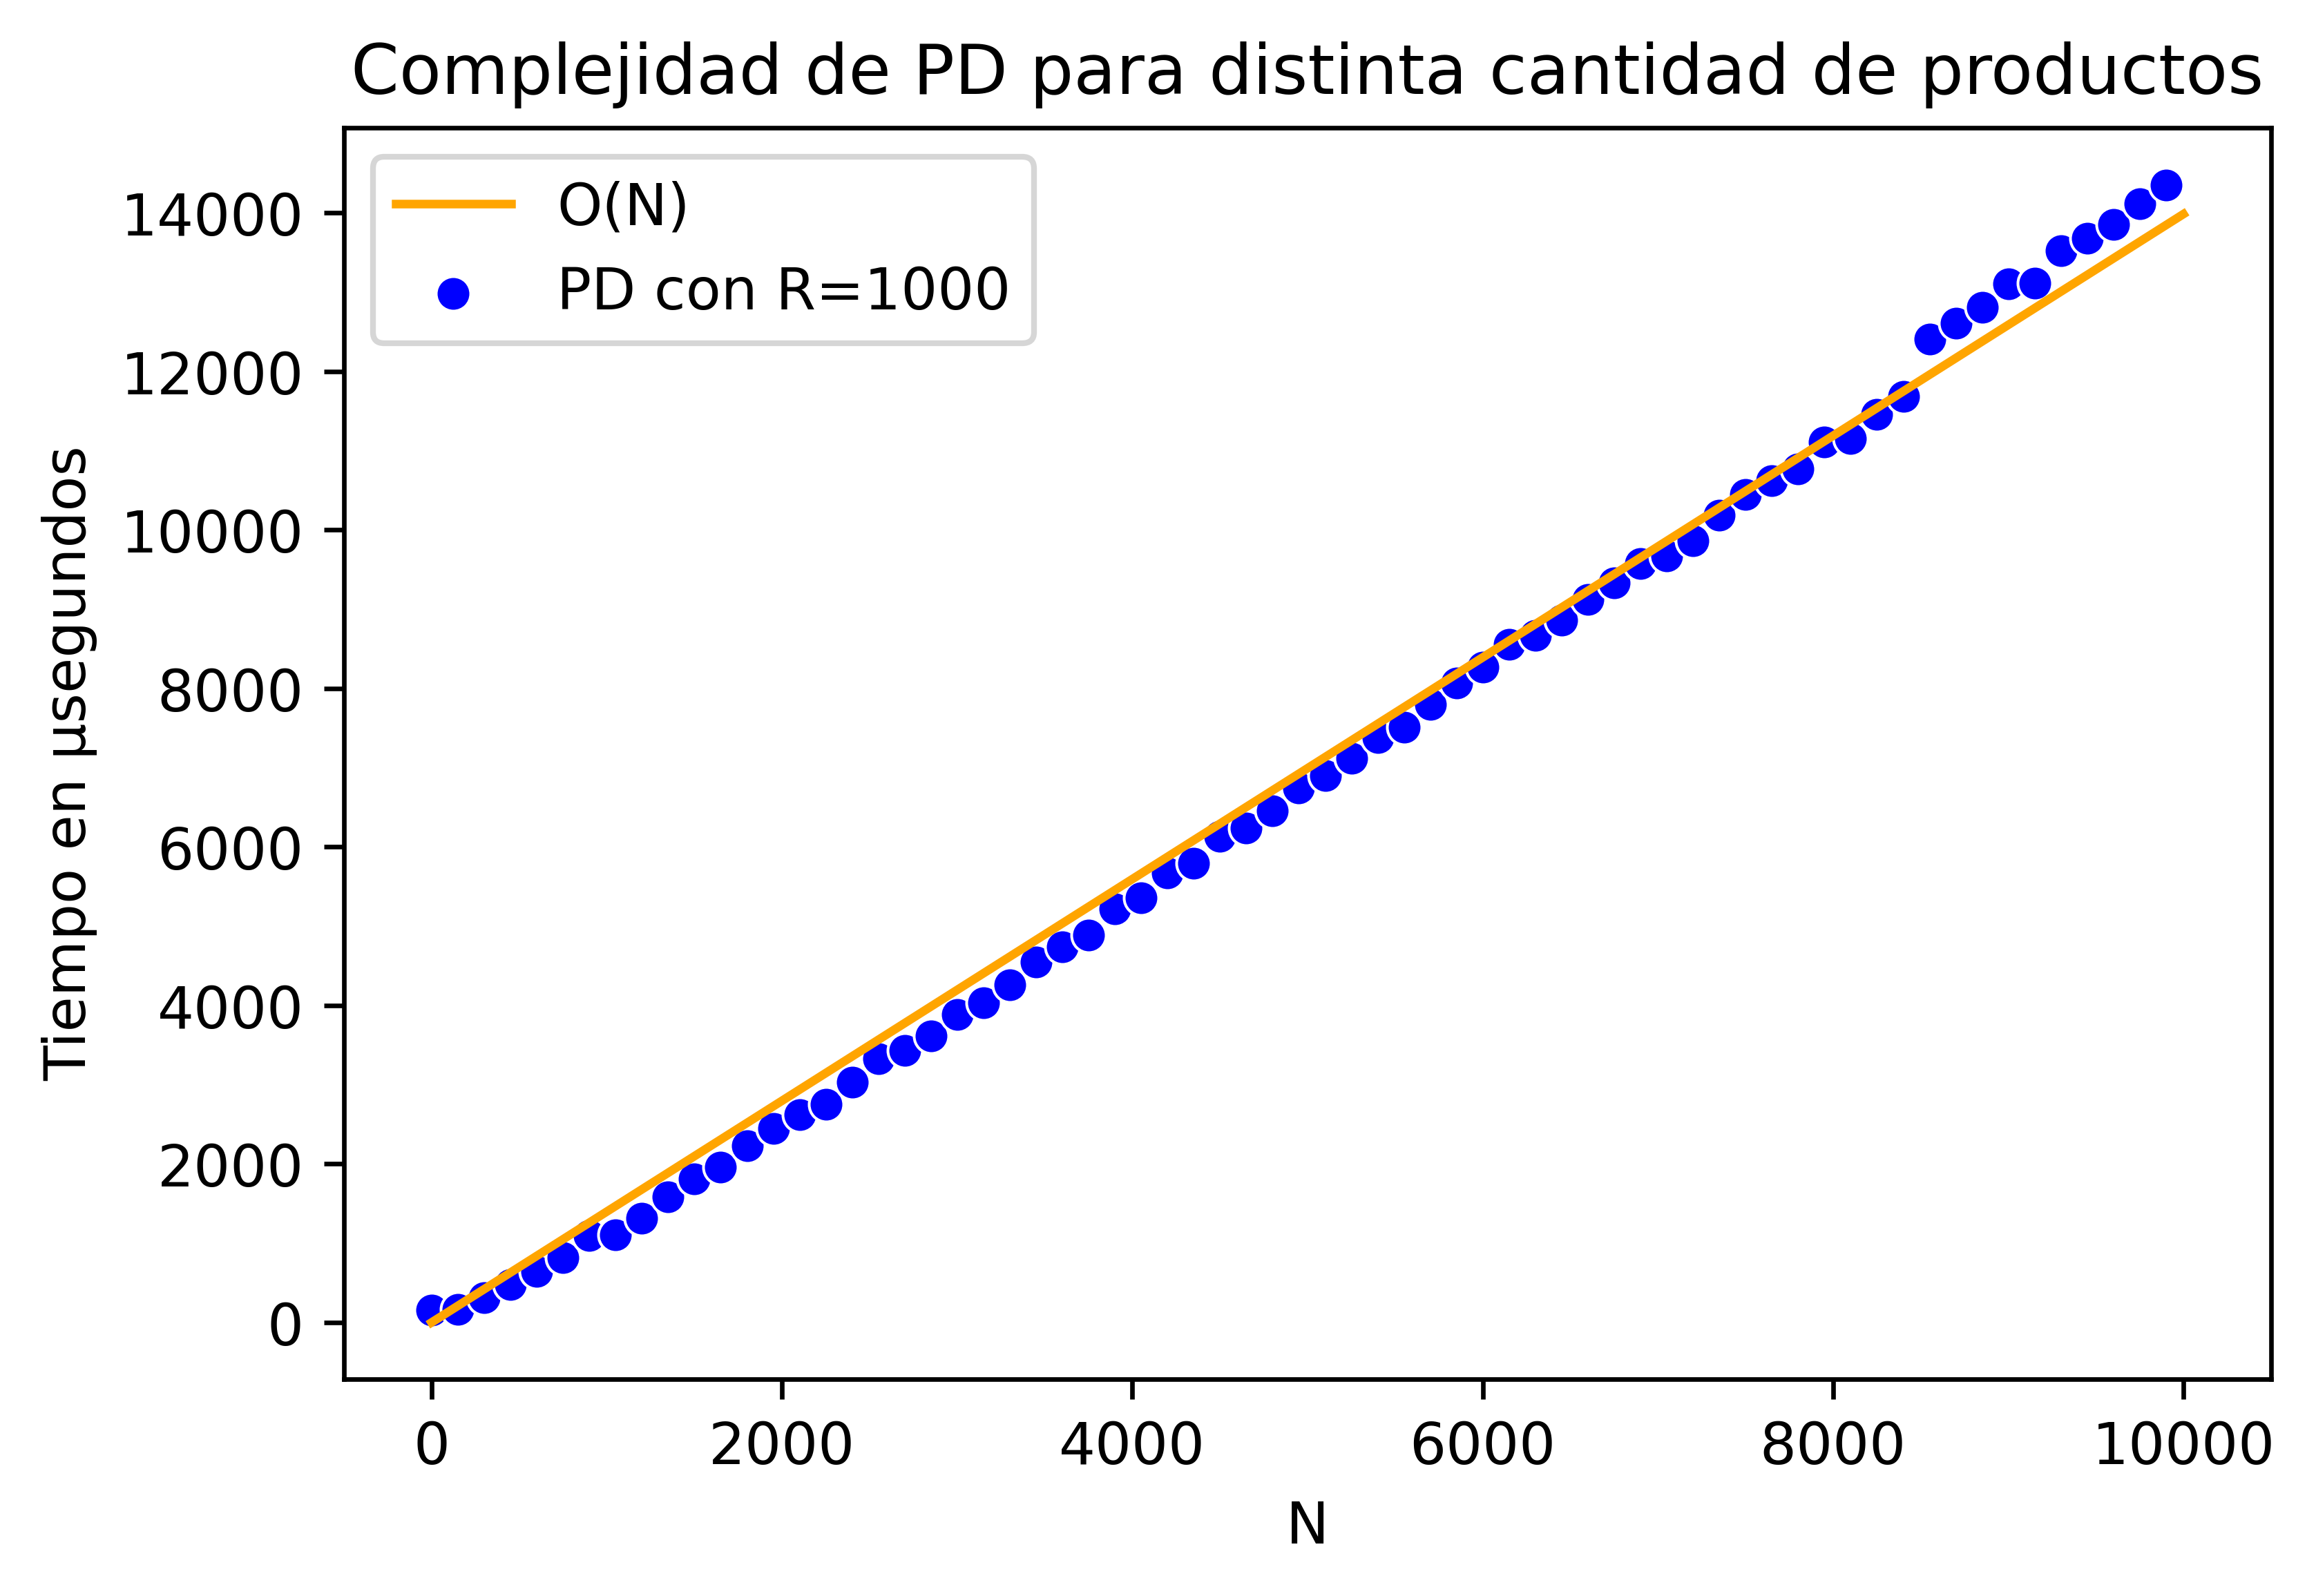

In [19]:
fig, ax = plt.subplots(dpi=600)

x = np.array([0, 10000])
sns.scatterplot(data=PDRFijo.iloc[::150, :], x='N', y='DP_usec', color='blue', label='PD con R=1000')
plt.plot(x, lineal(x, coefsPDRFijo[0]), color='orange', label='O(N)')

plt.ylabel('Tiempo en μsegundos ')
plt.title('Complejidad de PD para distinta cantidad de productos')
plt.legend(loc='upper left')

# plt.savefig('graficos/PDRfijo.png')

## PD N fijo

In [20]:
PDNFijo = pd.read_csv("data/PDNFijoFix.csv")
display(PDNFijo)

,DP_usec,DP_msec,N,R,RES
0,7,0,100,10,4
1,9,0,100,11,4
2,7,0,100,12,4
3,6,0,100,13,4
4,5,0,100,14,4
...,...,...,...,...,...
5021,898,0,100,5031,4
5022,866,0,100,5032,4
5023,901,0,100,5033,4
5024,846,0,100,5034,4


In [24]:
coefsPDNFijo, cov = curve_fit(f=lineal, xdata=PDNFijo['R'].to_numpy(), ydata=PDNFijo['DP_usec'].to_numpy(), p0=[0], bounds=(-np.inf, np.inf))


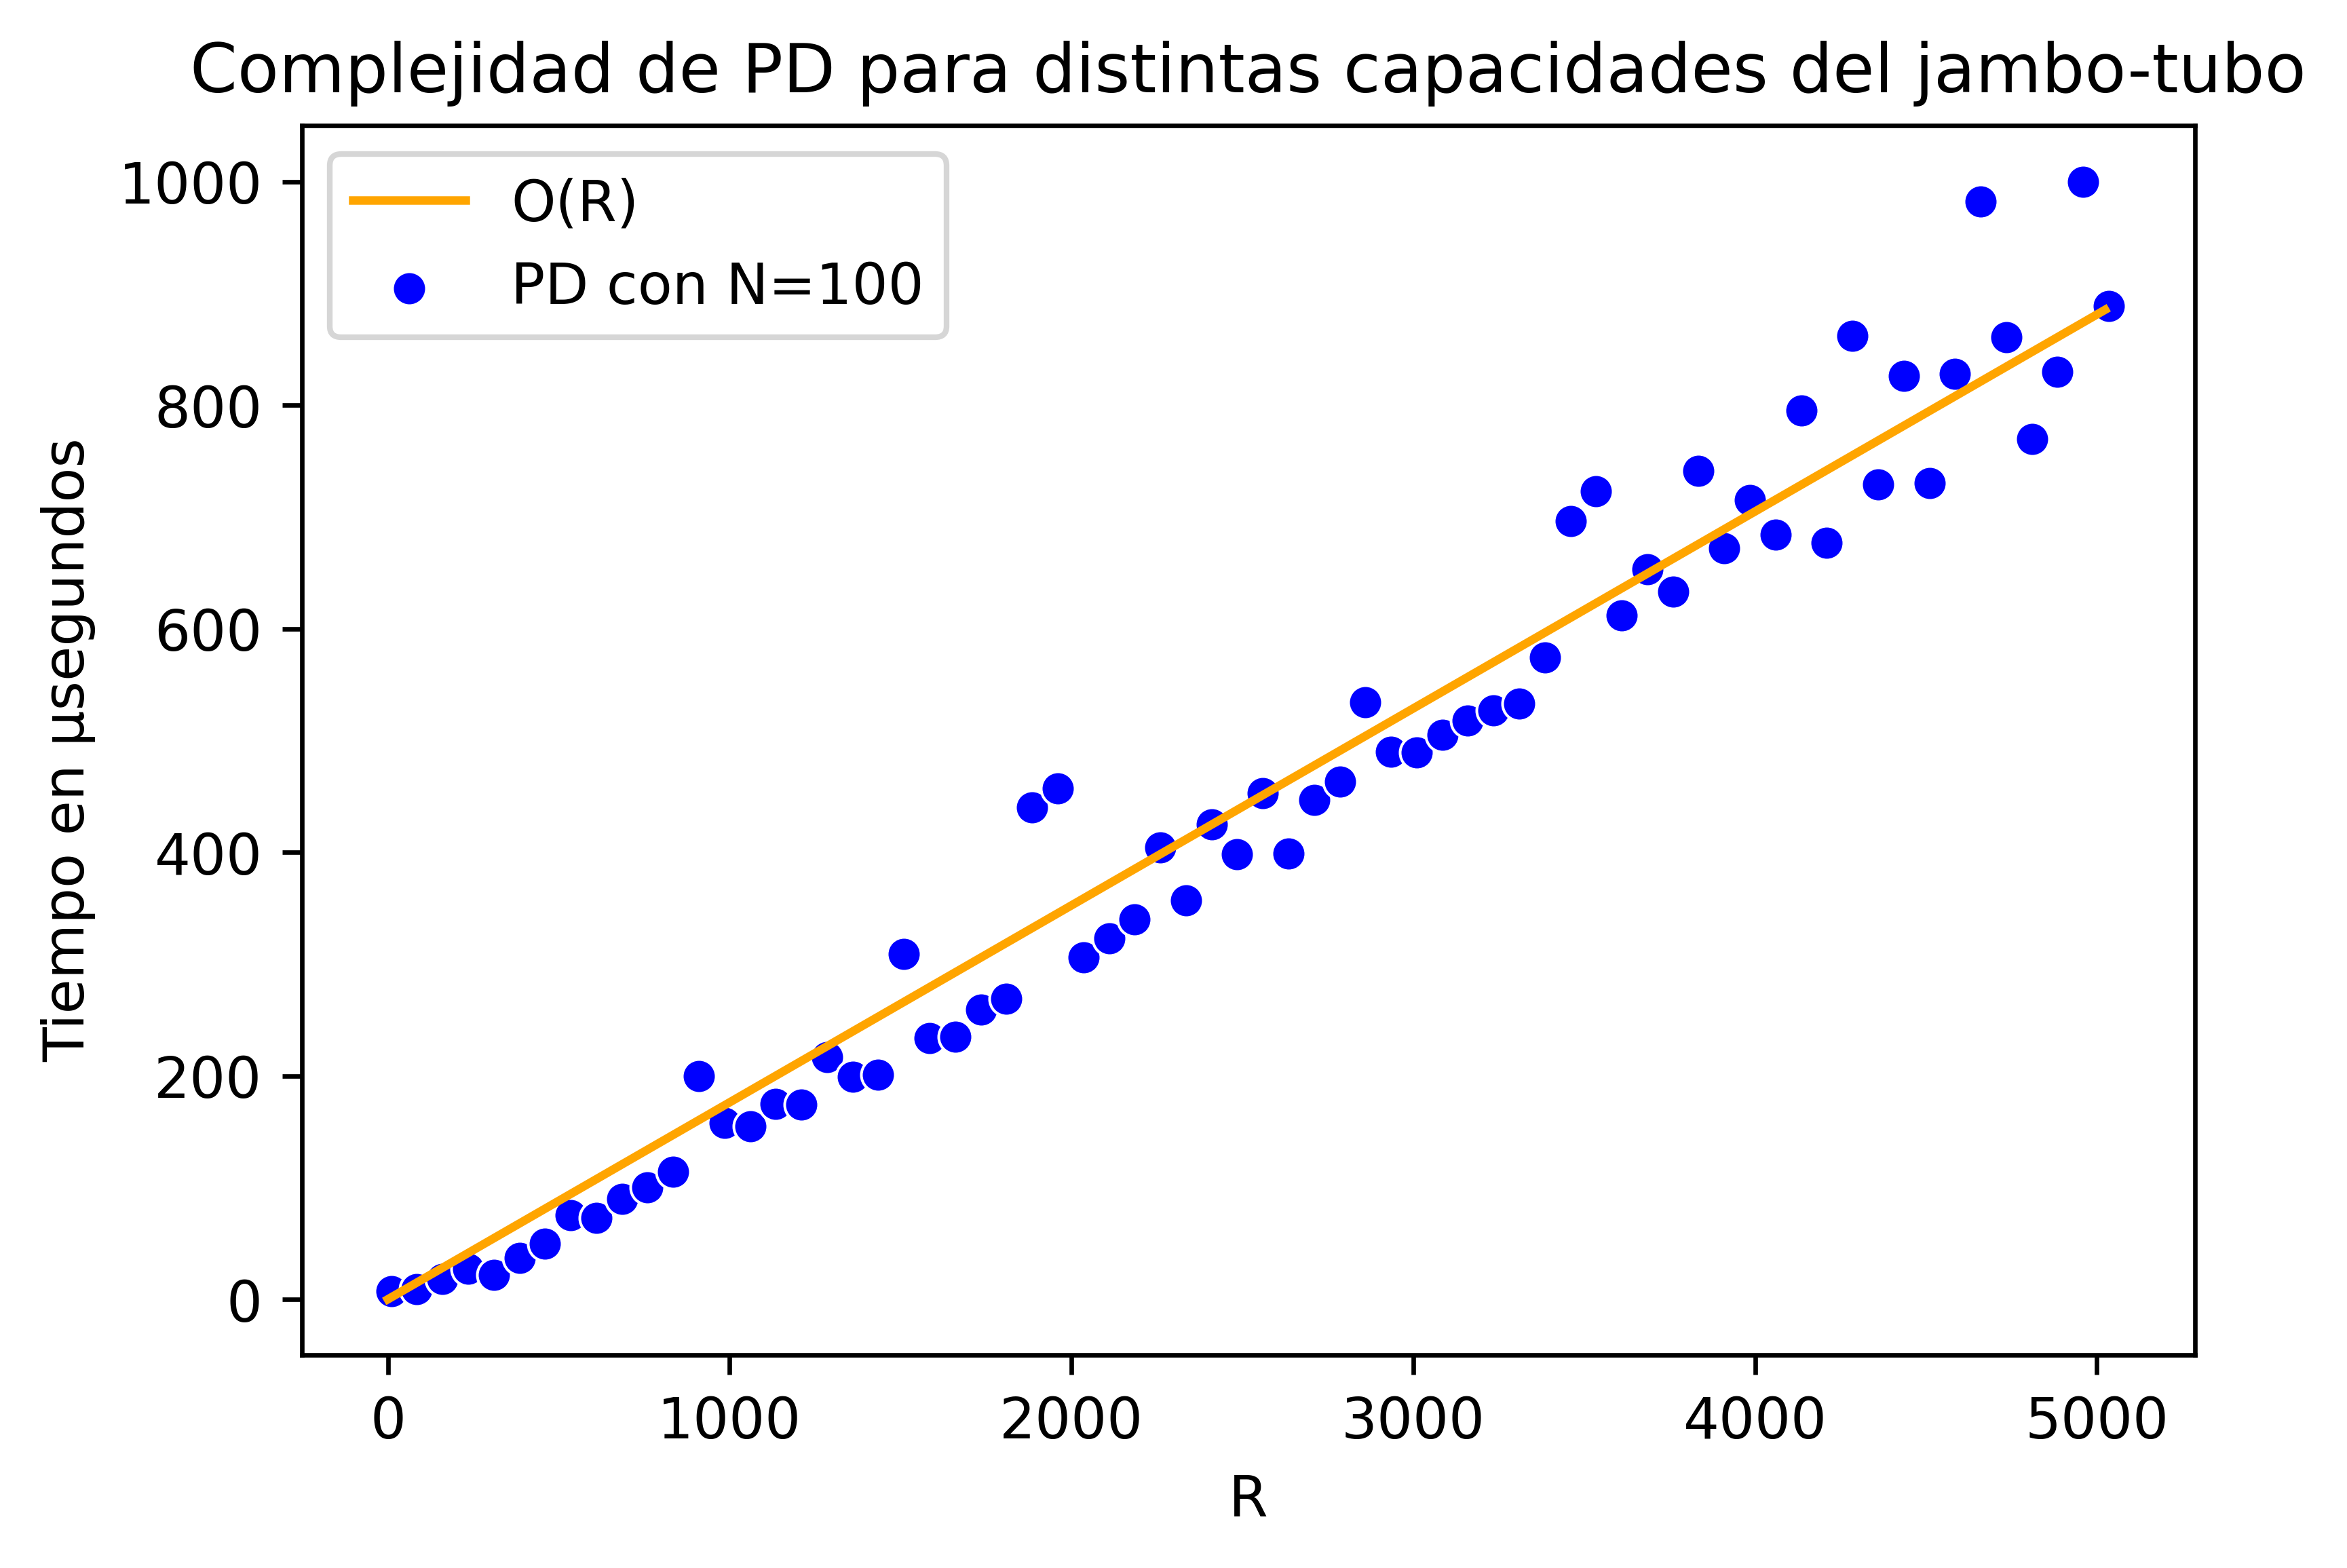

In [25]:
fig, ax = plt.subplots(dpi=600)

sns.scatterplot(data=PDNFijo.iloc[::75, :], x='R', y='DP_usec', color='blue', label='PD con N=100')
R = np.arange(0, 5025)
plt.plot(R, lineal(R, coefsPDNFijo[0]), color='orange', label='O(R)')


plt.ylabel('Tiempo en μsegundos ')
plt.title('Complejidad de PD para distintas capacidades del jambo-tubo')
plt.legend(loc='upper left')

# plt.savefig('graficos/PDNfijo.png')

## PD Variando todo

In [3]:
PDVariandoTodo = pd.read_csv('data/PDCrossVal.csv')
display(PDVariandoTodo)

,DP_usec,DP_msec,N,R,RES
0,4104,3,1000,1000,4
1,2213,1,1000,1500,4
2,2277,2,1000,2000,4
3,2793,2,1000,2500,4
4,3592,3,1000,3000,4
...,...,...,...,...,...
191,54229,53,7500,5500,4
192,58907,58,7500,6000,4
193,63742,63,7500,6500,4
194,68788,68,7500,7000,4


In [6]:
PDVariandoTodo['esperada'] = PDVariandoTodo['N']*PDVariandoTodo['R']
display(PDVariandoTodo)

,DP_usec,DP_msec,N,R,RES,esperada
0,4104,3,1000,1000,4,1000000
1,2213,1,1000,1500,4,1500000
2,2277,2,1000,2000,4,2000000
3,2793,2,1000,2500,4,2500000
4,3592,3,1000,3000,4,3000000
...,...,...,...,...,...,...
191,54229,53,7500,5500,4,41250000
192,58907,58,7500,6000,4,45000000
193,63742,63,7500,6500,4,48750000
194,68788,68,7500,7000,4,52500000


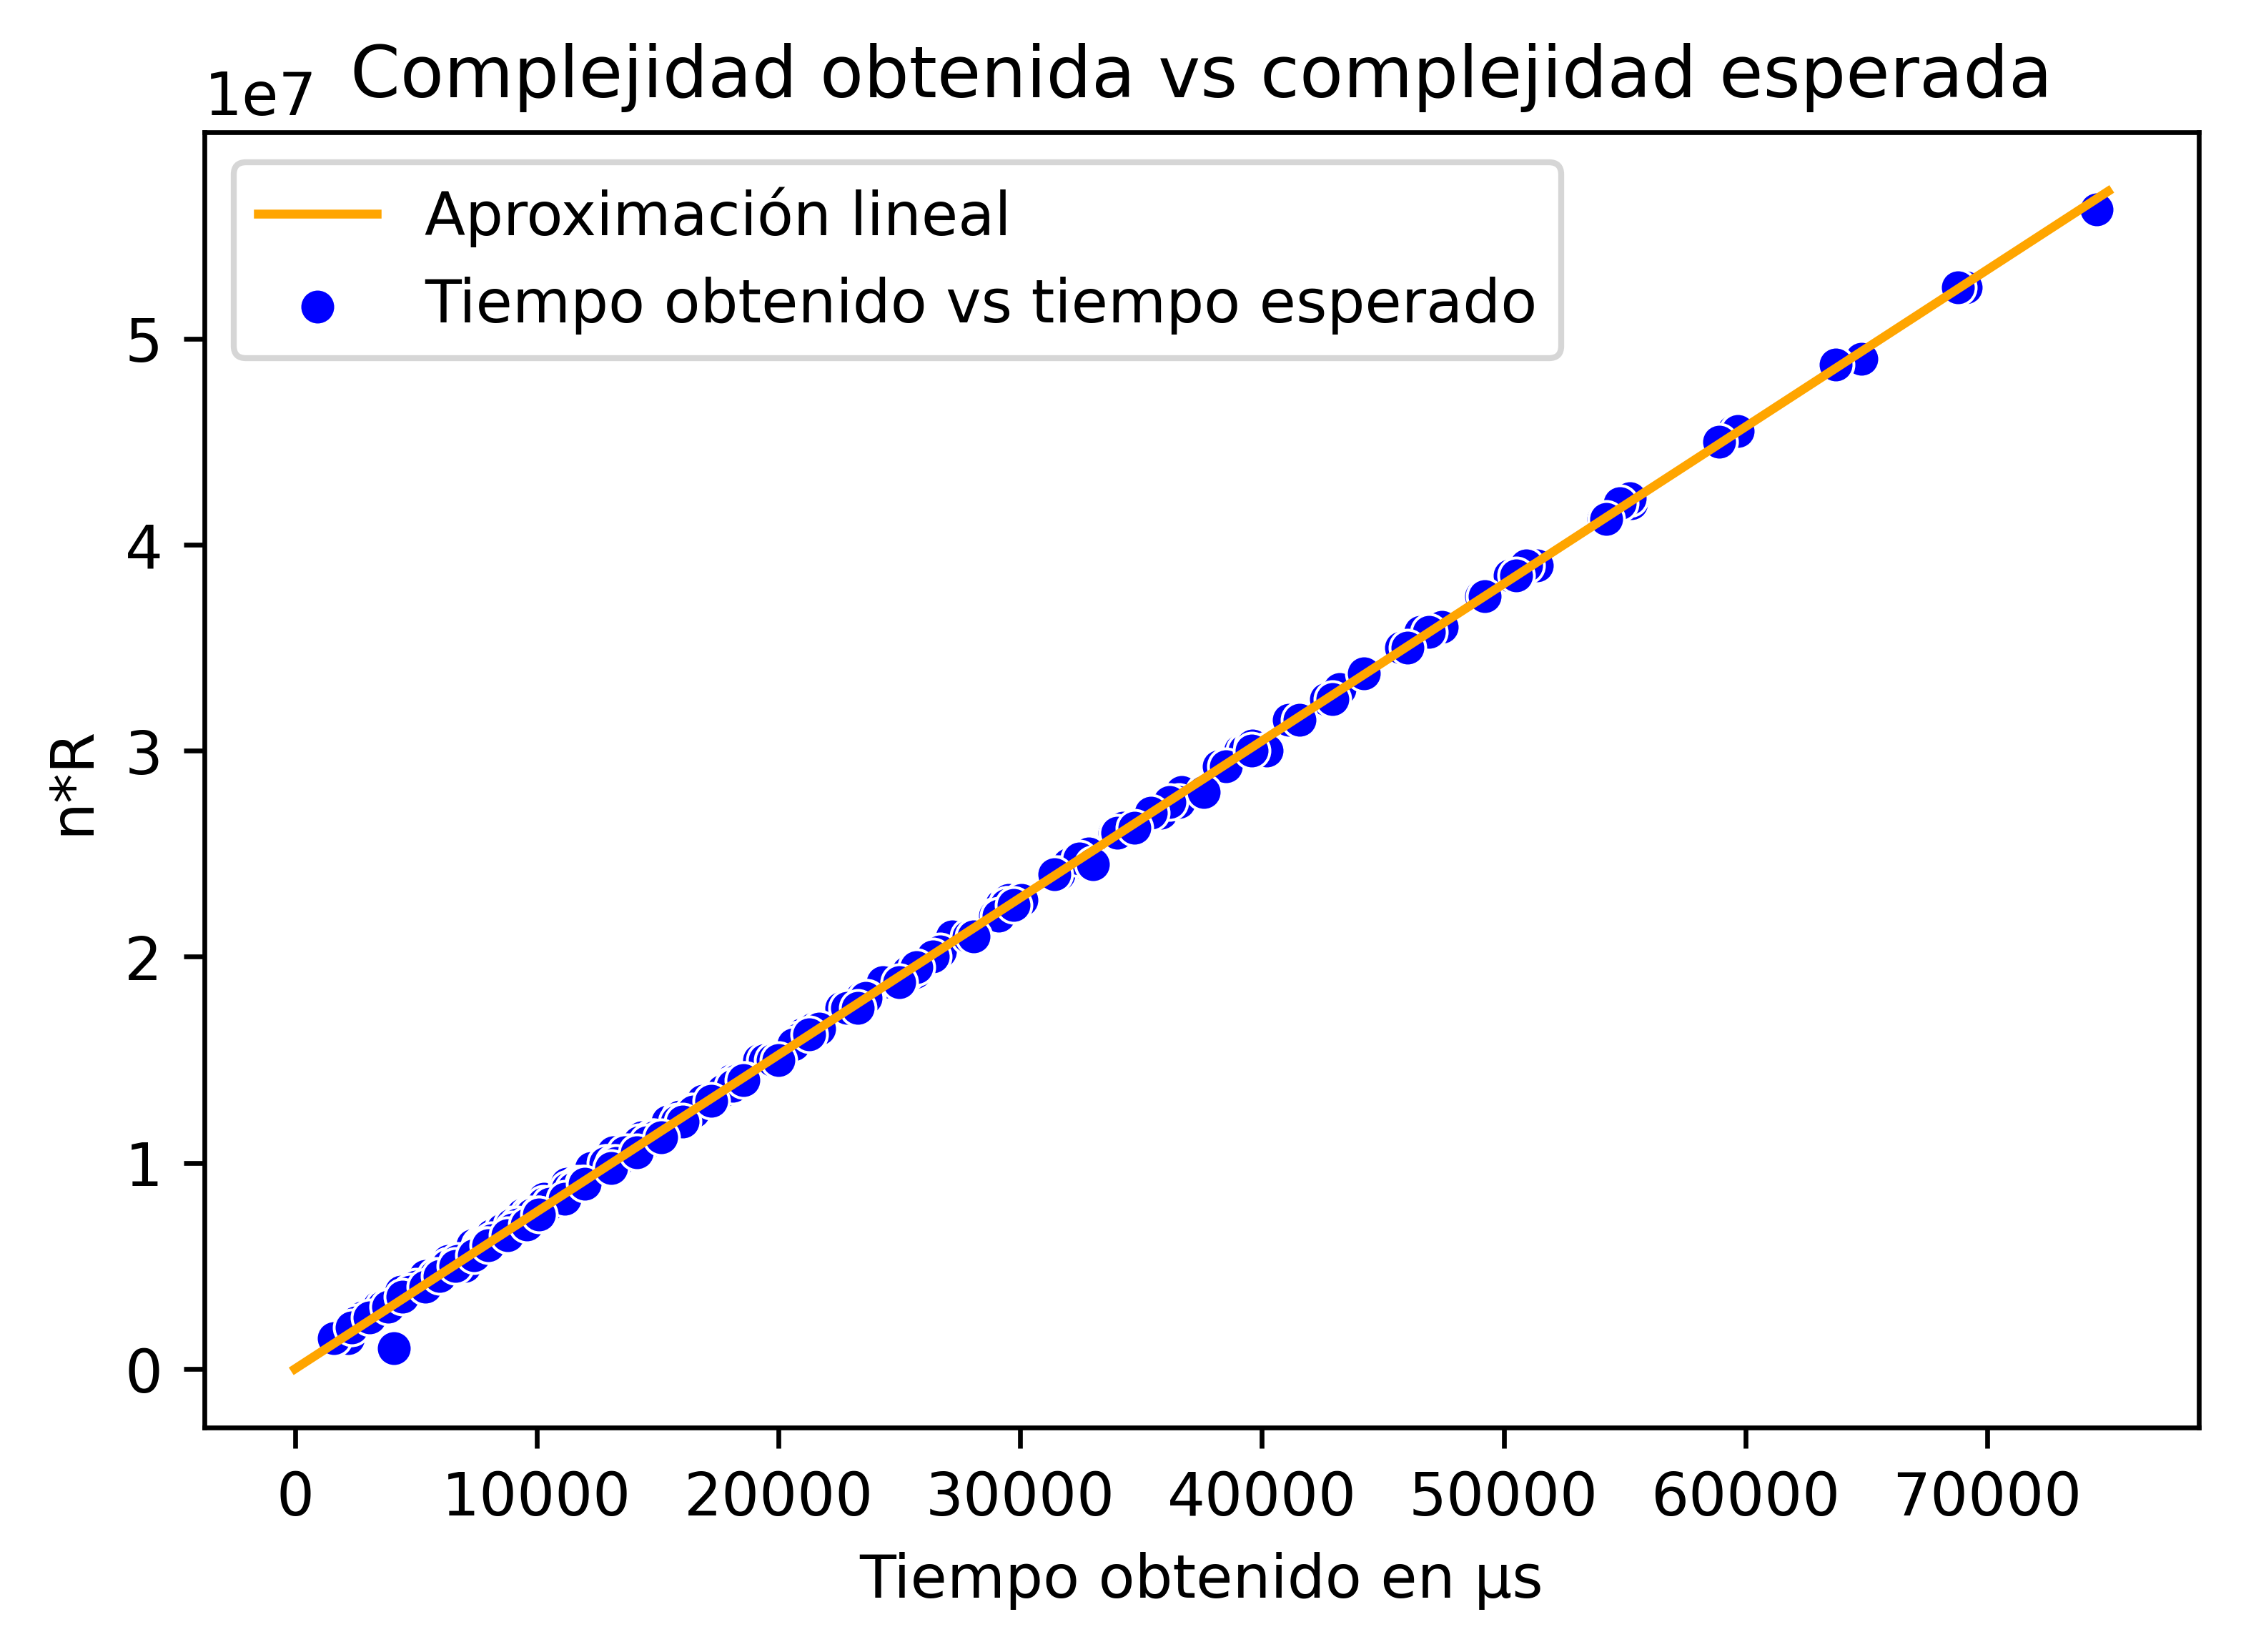

In [11]:
coefsPD, cov = curve_fit(f=lineal, xdata=PDVariandoTodo['DP_usec'].to_numpy(), ydata=PDVariandoTodo['esperada'].to_numpy(), p0=[0], bounds=(-np.inf, np.inf))



fig, ax = plt.subplots(dpi=600)
x = np.array([0, 75000])
plt.xlabel('Tiempo obtenido en μs')
plt.ylabel('n*R')
sns.scatterplot(data=PDVariandoTodo, x='DP_usec', y='esperada', color='blue', label='Tiempo obtenido vs tiempo esperado')
plt.plot(x, lineal(x, coefsPD[0]), color='orange', label='Aproximación lineal')
plt.title('Complejidad obtenida vs complejidad esperada')
plt.legend(loc='best')
# plt.savefig('graficos/obtenida-vs-esperada-PD.png')
plt.show()


In [12]:
correlacion_pearson(PDVariandoTodo, 'DP_usec', 'esperada')

0.9998035848032021

Text(0.5, 1.0, 'Tiempo obtenido en μseg en función de N y R')

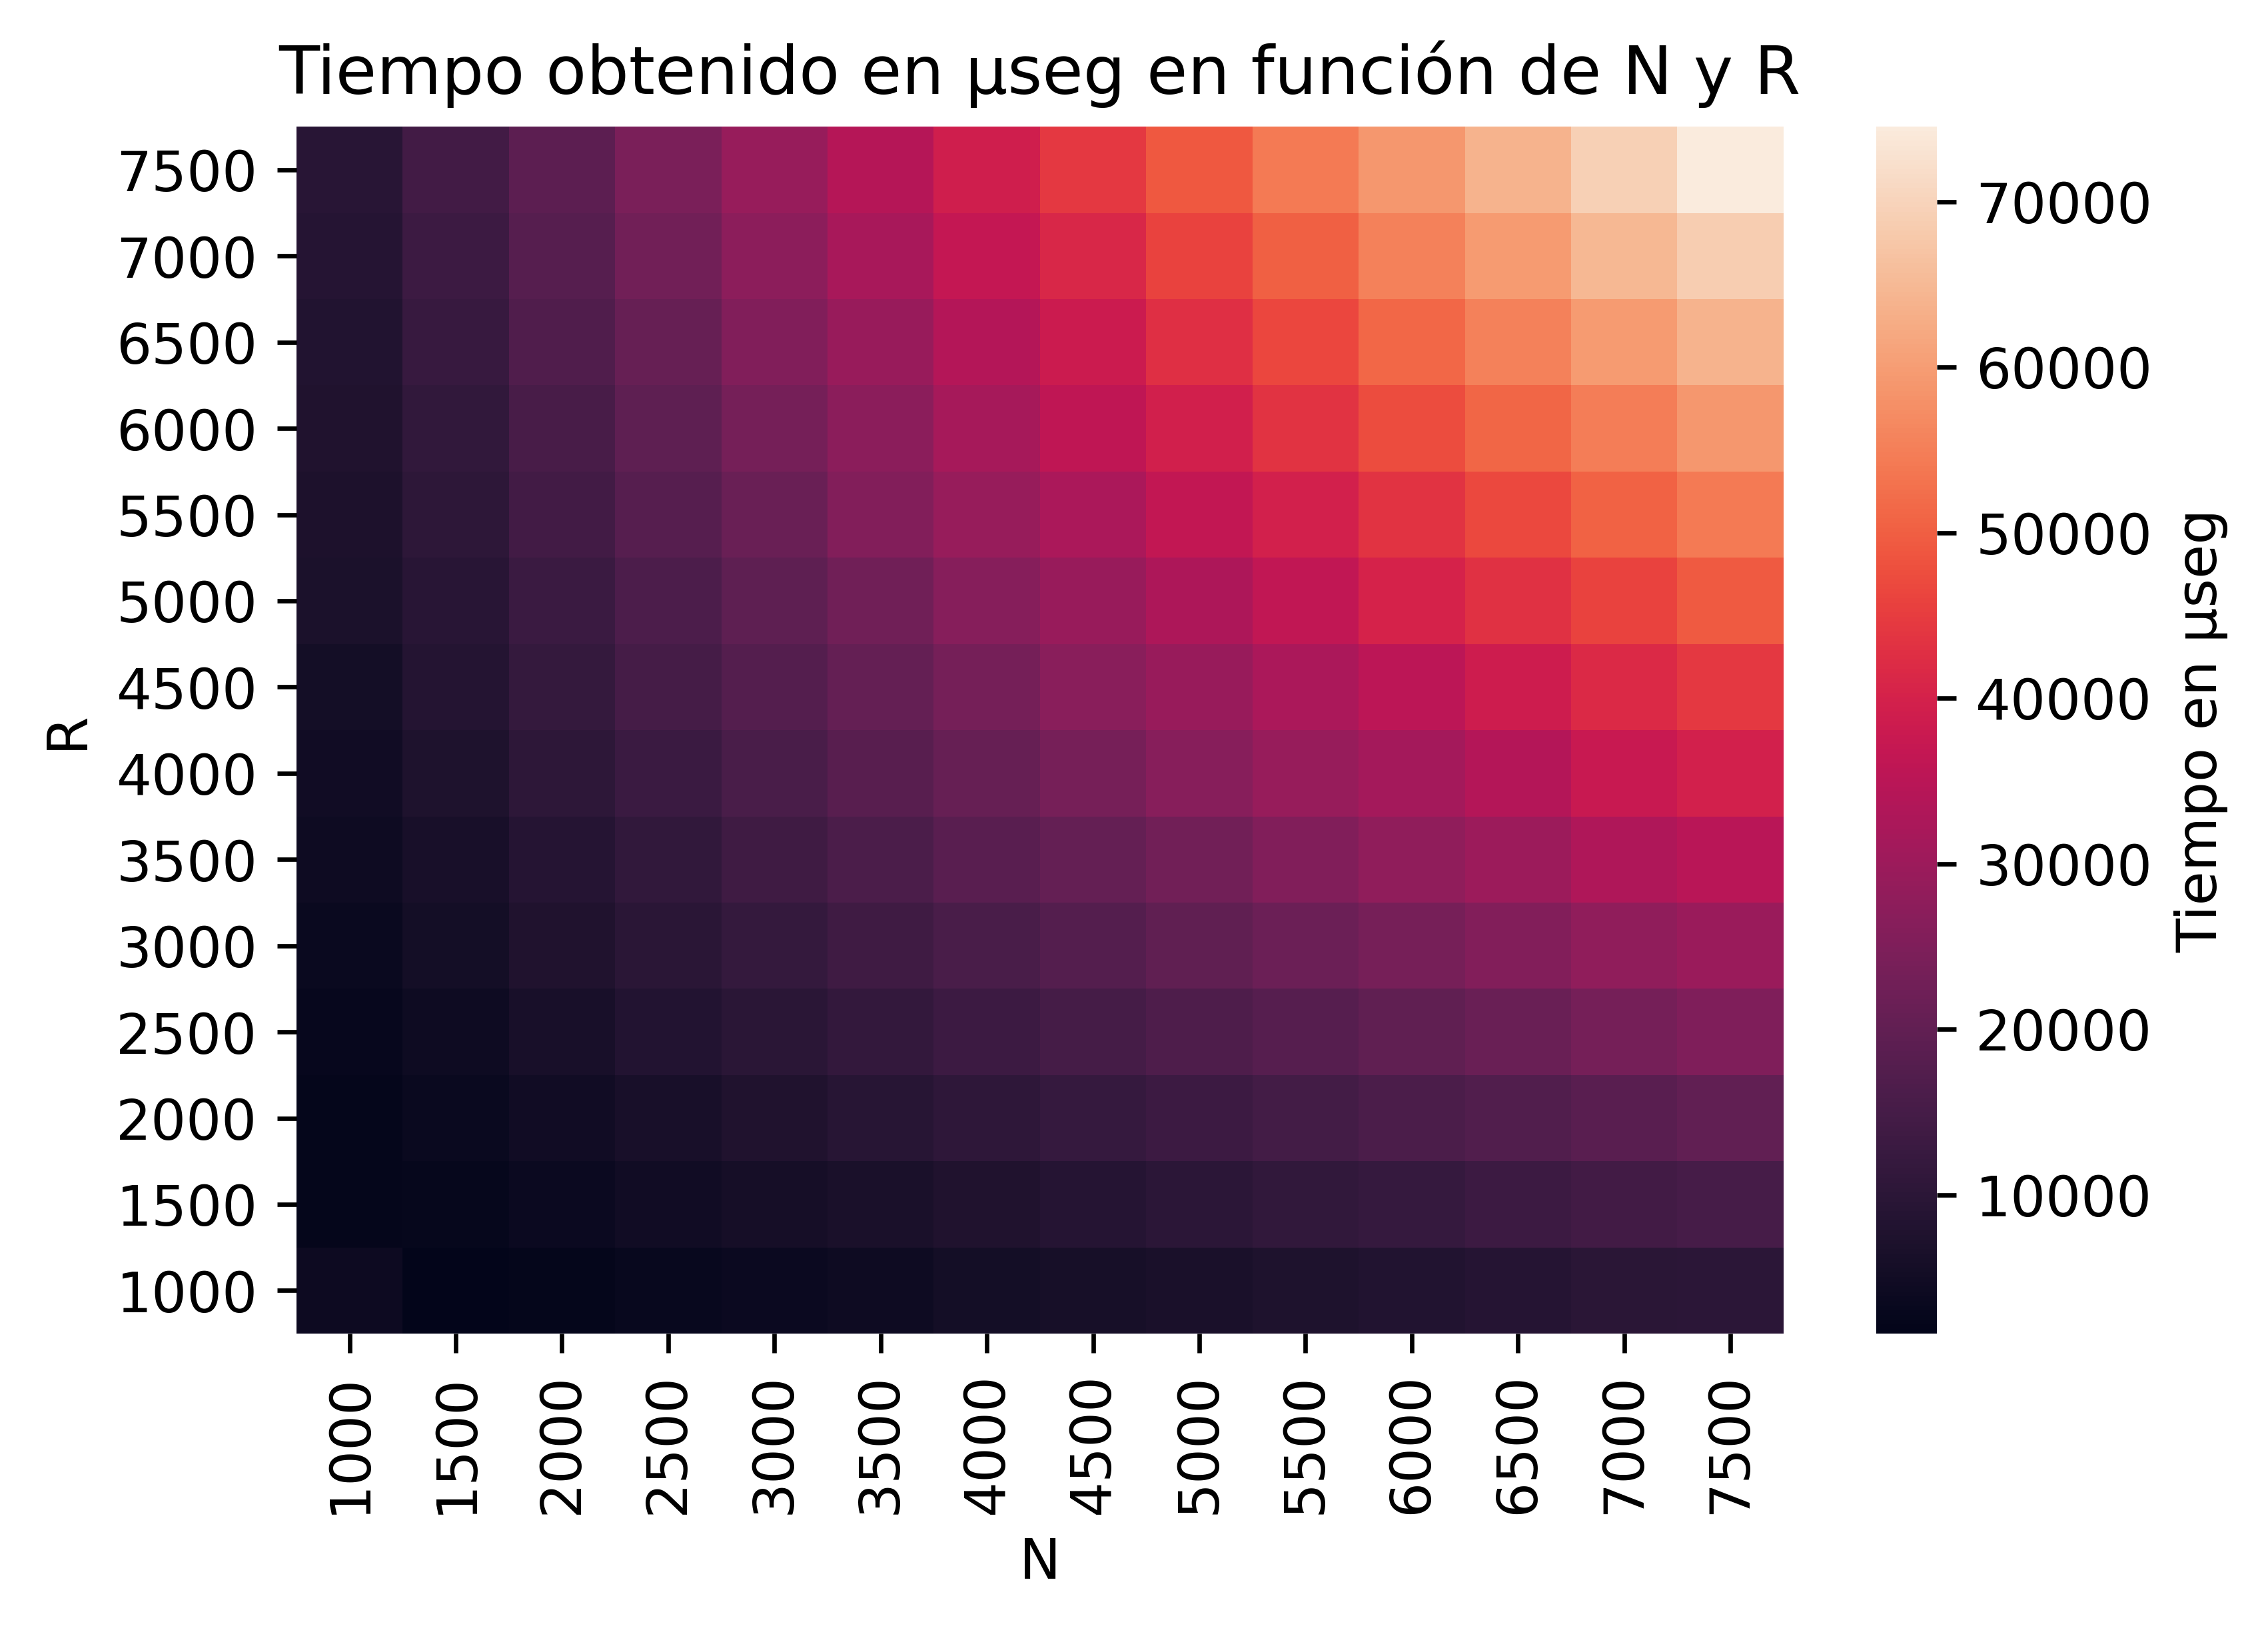

In [13]:
fig, ax = plt.subplots(dpi=600)

ax = sns.heatmap(PDVariandoTodo.pivot('R', 'N', 'DP_usec'), cbar_kws={'label': 'Tiempo en μseg'})
ax.invert_yaxis()

plt.title('Tiempo obtenido en μseg en función de N y R')
# plt.savefig('graficos/heatmap-PD.png')